In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!unzip "AMIGOS.zip"

Archive:  AMIGOS.zip
  inflating: AMIGOS/Data_Preprocessed_P01.mat  
  inflating: AMIGOS/Data_Preprocessed_P02.mat  
  inflating: AMIGOS/Data_Preprocessed_P03.mat  
  inflating: AMIGOS/Data_Preprocessed_P04.mat  
  inflating: AMIGOS/Data_Preprocessed_P05.mat  
  inflating: AMIGOS/Data_Preprocessed_P06.mat  
  inflating: AMIGOS/Data_Preprocessed_P07.mat  
  inflating: AMIGOS/Data_Preprocessed_P08.mat  
  inflating: AMIGOS/Data_Preprocessed_P09.mat  
  inflating: AMIGOS/Data_Preprocessed_P10.mat  
  inflating: AMIGOS/Data_Preprocessed_P11.mat  
  inflating: AMIGOS/Data_Preprocessed_P12.mat  
  inflating: AMIGOS/Data_Preprocessed_P13.mat  
  inflating: AMIGOS/Data_Preprocessed_P14.mat  
  inflating: AMIGOS/Data_Preprocessed_P15.mat  
  inflating: AMIGOS/Data_Preprocessed_P16.mat  
  inflating: AMIGOS/Data_Preprocessed_P17.mat  
  inflating: AMIGOS/Data_Preprocessed_P18.mat  
  inflating: AMIGOS/Data_Preprocessed_P19.mat  
  inflating: AMIGOS/Data_Preprocessed_P20.mat  
  inflating: AMIGOS

In [13]:
import scipy.io
data = scipy.io.loadmat("AMIGOS/Data_Preprocessed_P32.mat")

In [26]:
#data['joined_data'][0][19].shape
#data['labels_selfassessment'][0][15].shape
#data['joined_data'].shape[1]
#data['labels_selfassessment'][0][1][0].shape

(1, 12)

(10191,)

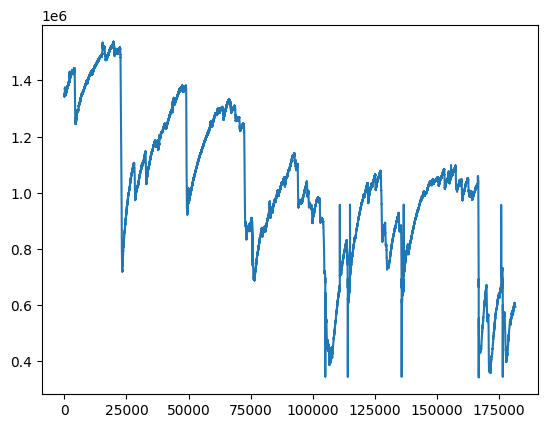

In [42]:
import matplotlib.pyplot as plt
plt.plot(data['joined_data'][0][16][384:,16])
data['joined_data'][0][3][384:,16].shape

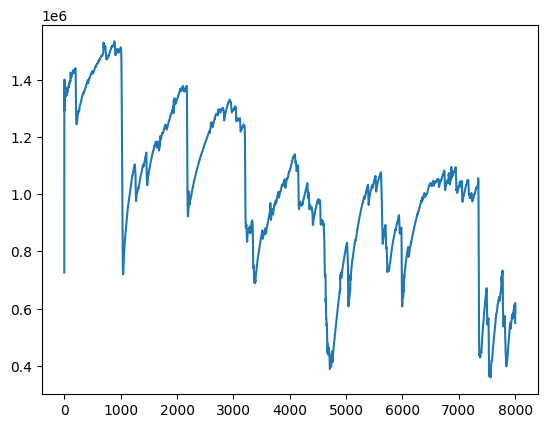

In [43]:
import scipy.io
y1 = scipy.signal.resample(data['joined_data'][0][16][:,16], 8000)
plt.plot(y1)


In [1]:
import glob
import os
filelist = glob.glob('AMIGOS/*.mat')
print(filelist)
subjectnames = [fr[25:28] for fr in filelist]
print(subjectnames)

['AMIGOS/Data_Preprocessed_P33.mat', 'AMIGOS/Data_Preprocessed_P30.mat', 'AMIGOS/Data_Preprocessed_P13.mat', 'AMIGOS/Data_Preprocessed_P26.mat', 'AMIGOS/Data_Preprocessed_P37.mat', 'AMIGOS/Data_Preprocessed_P31.mat', 'AMIGOS/Data_Preprocessed_P10.mat', 'AMIGOS/Data_Preprocessed_P09.mat', 'AMIGOS/Data_Preprocessed_P05.mat', 'AMIGOS/Data_Preprocessed_P40.mat', 'AMIGOS/Data_Preprocessed_P35.mat', 'AMIGOS/Data_Preprocessed_P32.mat', 'AMIGOS/Data_Preprocessed_P22.mat', 'AMIGOS/Data_Preprocessed_P23.mat', 'AMIGOS/Data_Preprocessed_P17.mat', 'AMIGOS/Data_Preprocessed_P04.mat', 'AMIGOS/Data_Preprocessed_P12.mat', 'AMIGOS/Data_Preprocessed_P34.mat', 'AMIGOS/Data_Preprocessed_P29.mat', 'AMIGOS/Data_Preprocessed_P15.mat', 'AMIGOS/Data_Preprocessed_P02.mat', 'AMIGOS/Data_Preprocessed_P25.mat', 'AMIGOS/Data_Preprocessed_P18.mat', 'AMIGOS/Data_Preprocessed_P36.mat', 'AMIGOS/Data_Preprocessed_P16.mat', 'AMIGOS/Data_Preprocessed_P28.mat', 'AMIGOS/Data_Preprocessed_P03.mat', 'AMIGOS/Data_Preprocessed_P

In [2]:
import scipy.io
import numpy as np
data_am = {}
skiplist = ['P28','P08','P24','P32']
newsubjectname = []
for sname in subjectnames:
    if sname in skiplist:
      continue
    newsubjectname.append(sname)
    dname = "AMIGOS/Data_Preprocessed_"+sname+".mat"
    x = scipy.io.loadmat(dname)
    print(sname)
    samples = []
    samples_labels = []
    for i in range(x['joined_data'].shape[1]):
        x1 = x['joined_data'][0][i]
        x2 = scipy.signal.resample(x1[384:,16], 8064)
        y1 = x['labels_selfassessment'][0][i][0][0:2]
        samples.append(x2)
        samples_labels.append(y1)
    samples_stack = np.vstack(samples)
    samples_labels_stack = np.vstack(samples_labels)
    data_am[sname] = [samples_stack,samples_labels_stack]

print(data_am.keys())

P33
P30
P13
P26
P37
P31
P10
P09
P05
P40
P35
P22
P23
P17
P04
P12
P34
P29
P15
P02
P25
P18
P36
P16
P03
P38
P39
P27
P01
P19
P06
P11
P21
P07
P14
P20
dict_keys(['P33', 'P30', 'P13', 'P26', 'P37', 'P31', 'P10', 'P09', 'P05', 'P40', 'P35', 'P22', 'P23', 'P17', 'P04', 'P12', 'P34', 'P29', 'P15', 'P02', 'P25', 'P18', 'P36', 'P16', 'P03', 'P38', 'P39', 'P27', 'P01', 'P19', 'P06', 'P11', 'P21', 'P07', 'P14', 'P20'])


In [8]:
data_am['P01'][0]

array([3237180.31474926, 3110649.65303398, 3179062.7496687 , ...,
       3514282.08715568, 3478618.13315719, 3540966.49534216])

In [5]:
import numpy as np
import matplotlib.pyplot as plt
data_cam = {}
for k,v in data_am.items():
    y = v[0]
    ym = np.mean(y,axis=-1).reshape(20,1)
    ystd = np.std(y,axis=-1).reshape(20,1)
    z = (y-ym)/ystd
    #print(z.shape)
    data_cam[k] = [z,v[1]]

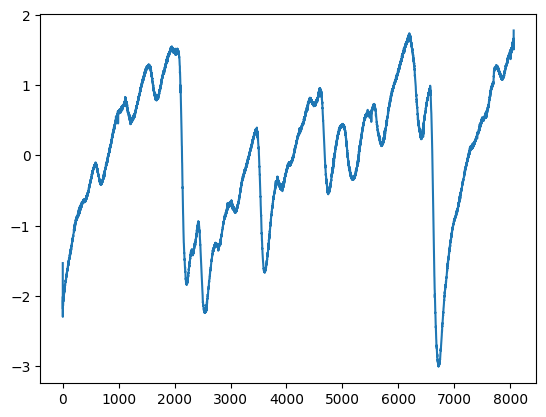

In [5]:
plt.plot(data_cam['P01'][0][0])

In [6]:
import torch
data_c1d = {}
BLOCK_SIZE=640
BLOCK_STRIDE=60
for k,v in data_cam.items():
    datablocki = []
    v1 = v[0]
    v1 = v1[:,np.newaxis,:]
    #print(v1.shape)
    data_c1d[k] = torch.tensor(v1)
print(data_c1d['P01'][0].shape)

torch.Size([1, 8064])


In [5]:
data_c2 = {}
for k,v in data_cam.items():
    y = v[1]
    x_label = np.zeros((y.shape[0]),dtype='float64')
    for i in range(y.shape[0]):
        if (y[i][0] > 5):
            x_label[i] = 1
        else:
            x_label[i] = 0

    x_l = x_label
    x_l = x_l.reshape(-1,1)
    x_l = torch.tensor(x_l)
    data_c2[k] = x_l

In [24]:
data_c2['P02']

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.]], dtype=torch.float64)

In [7]:
data_c2 = {}
maxnum = 3
for k,v in data_cam.items():
    y = v[1]
    x_label = np.zeros((y.shape[0]),dtype='int32')
    for i in range(y.shape[0]):
        if (y[i][1] > 5 and y[i][0] > 5):
            x_label[i] = 3
        elif (y[i][1] <= 5 and y[i][0] > 5):
            x_label[i] = 2
        elif (y[i][1] > 5 and y[i][0] <= 5):
            x_label[i] = 1
        elif (y[i][1] <= 5 and y[i][0] <= 5):
            x_label[i] = 0

    x_l = np.zeros((x_label.size, maxnum+1))
    x_l[np.arange(x_label.size), x_label] = 1

    x_l = torch.tensor(x_l)
    data_c2[k] = x_l


In [18]:
data_c2['P01'].shape

torch.Size([20, 4])

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#from torchinfo import Summary
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1=nn.Conv1d(1, 34, 10,stride=1)
        self.mp1=nn.MaxPool1d(2)
        self.norm1 = nn.BatchNorm1d(34)
        self.d = nn.Dropout(p=0.63)
        self.c2=nn.Conv1d(34, 30, 10,stride=1)
        self.mp2=nn.MaxPool1d(2)
        self.c3=nn.Conv1d(30, 10, 10,stride=1)
        self.norm3 = nn.BatchNorm1d(10)
        self.mp3=nn.MaxPool1d(2)
        self.ft = nn.Flatten()

        self.n1 = nn.Linear(20070,110)
        #self.n1 = nn.Linear(19590,110)
        self.normfc1=nn.BatchNorm1d(110)
        self.d = nn.Dropout(p=0.63)
        #self.d = nn.Dropout()
        self.n2 = nn.Linear(110,100)
        self.n3 = nn.Linear(100,4)


    def forward(self, x):
        x = self.d(self.norm1(F.tanh(self.c1(x))))
        #x=F.tanh(self.c1(x))
        x = self.mp2(F.tanh(self.c2(x)))
        #print(x.shape)
        x = self.mp3(F.tanh(self.c3(x)))

        #print(x.shape)
        x = self.ft(x)
        #print(x.shape)
        x = F.tanh(self.n1(x))
        x=self.normfc1(x)
        #x=self.norm3(x)
        x=self.d(x)

        #x = F.softmax(self.n2(x),dim=-1)
        x = F.tanh(self.n2(x))
        #x = F.sigmoid(self.n3(x))

        x = (self.n3(x))
        #print(x.shape)
        return x


criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()



In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_num
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
#print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 60
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_c1d[newsubjectname[tr]]
    l = data_c2[newsubjectname[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())

  '''
  for tr in test_index:
      net.eval()
      v = data_c1d[newsubjectname[tr]]
      l = data_c2[newsubjectname[tr]]
      net.eval()
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i].shape)
            #outputs1 = torch.softmax(outputs,dim=-1)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            #loss.backward()
            actualoutput.append(torch.round(outputs.cpu()))
            expectedoutput.append(l[i:i+batch_sz])
            #actualoutput.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            #expectedoutput.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutput = np.concatenate( expectedoutput, axis=0 )
  actualoutput = np.concatenate( actualoutput, axis=0 )
  print(expectedoutput.shape)
  print(actualoutput.shape)
  print(classification_report(expectedoutput,actualoutput))
  print(confusion_matrix(expectedoutput,actualoutput))
  print(f'Validation Loss for {subjectnames[tr]} = {val_loss_mean}')
  #break
  '''
#plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
#plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
#plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
#plt.legend()
#path = "Model"+str(modelid) +".pt"
#path = "ModelAMIGOS_Aro.pt"
#modelid = modelid+1
#print(path)
#torch.save(net.state_dict(), path)

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


/tmp/ipykernel_203/3472248682.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1/60, Train Loss: 0.6609741449356079
Epoch 2/60, Train Loss: 0.6968510746955872
Epoch 3/60, Train Loss: 0.7063091397285461
Epoch 4/60, Train Loss: 0.7129724025726318
Epoch 5/60, Train Loss: 0.6755002737045288
Epoch 6/60, Train Loss: 0.677463948726654
Epoch 7/60, Train Loss: 0.7001715302467346
Epoch 8/60, Train Loss: 0.641160249710083
Epoch 9/60, Train Loss: 0.6524507403373718
Epoch 10/60, Train Loss: 0.6981868147850037
Epoch 11/60, Train Loss: 0.7125951051712036
Epoch 12/60, Train Loss: 0.6761418581008911
Epoch 13/60, Train Loss: 0.6650707125663757
Epoch 14/60, Train Loss: 0.6498364806175232
Epoch 15/60, Train Loss: 0.6750850081443787
Epoch 16/60, Train Loss: 0.7362504005432129
Epoch 17/60, Train Loss: 0.6782377362251282
Epoch 18/60, Train Loss: 0.6005708575248718
Epoch 19/60, Train Loss: 0.6484631896018982
Epoch 20/60, Train Loss: 0.6615355610847473
Epoch 21/60, Train Loss: 0.7476146817207336
Epoch 22/60, Train Loss: 0.6450007557868958
Epoch 23/60, Train Loss: 0.6990272998809814

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
batch_sz = 20
file_list_num = np.arange(len(subjectnames))
modelid = 1
netValence = Net()
valmodelname = "Valence_Model4"+".pt"
netValence.load_state_dict(torch.load(valmodelname))
netValence.to(device)
netArousal = Net()
aromodelname = "Model5"+".pt"
netArousal.load_state_dict(torch.load(aromodelname))
netArousal.to(device)
for i in range(0,32,4):

    #optimizer = optim.Adam(net.parameters(), lr=0.000001)
    expectedoutput = []
    actualoutput = []
    for tr in file_list_num[i:i+4]:
        #net.eval()
        v = data_c1d[subjectnames[tr]]
        l = data_c3[subjectnames[tr]]
        netValence.eval()
        netArousal.eval()
        with torch.no_grad():
            for i in range(0,len(v),batch_sz):
              #print(v[i].shape)
              #for j in range(0,v[i].shape[0],batch_sz):
              #optimizer.zero_grad()
              outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
              outputs_val1 = torch.round(outputs_val)
              outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
              outputs_aro1 = torch.round(outputs_aro)

              #print(outputs_val1)
              for j in range(0,outputs_aro1.shape[0]):
                res = 0
                if (outputs_val1[j][0] >= 1 and outputs_aro1[j][0] >= 1):
                    res = 4
                elif (outputs_val1[j][0] < 1 and outputs_aro1[j][0] >= 1):
                    res = 3
                elif (outputs_val1[j][0] >= 1 and outputs_aro1[j][0] < 1):
                    res = 2
                elif (outputs_val1[j][0] < 1 and outputs_aro1[j][0] < 1):
                    res = 1
                actualoutput.append(res)
              #loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
              #val_loss.append(loss)
              #loss.backward()
              #print(outputs.shape)
              #print(l[i:i+batch_sz])
              expectedoutput.append(l[i:i+batch_sz])
              #actualoutput.append(actualoutput)
      #val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
      #val_loss_epoch.append(val_loss_mean)
    expectedoutput = np.concatenate( expectedoutput, axis=0 )
      #actualoutput = np.concatenate( actualoutput, axis=0 )
      #print(actualoutput)
    #print(expectedoutput)
    #print(actualoutput)
    print(classification_report(expectedoutput,actualoutput))
      #print(f'Validation Loss for {subjectnames[tr]} = {val_loss_mean}')
      #break

<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.39      0.22      0.28        41
           2       0.56      0.12      0.20        42
           3       0.24      0.52      0.33        27
           4       0.36      0.50      0.42        50

    accuracy                           0.33       160
   macro avg       0.39      0.34      0.31       160
weighted avg       0.40      0.33      0.31       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.50      0.17      0.25        42
           2       1.00      0.10      0.18        30
           3       0.34      0.83      0.48        41
           4       0.40      0.36      0.38        47

    accuracy                           0.38       160
   macro avg       0.56      0.36      0.32       160
weighted avg       0.52      0.38      0.33       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.21      0.19      0.20        31
           2       0.57      0.12      0.20        34
           3       0.29      0.53      0.37        43
           4       0.48      0.40      0.44        52

    accuracy                           0.34       160
   macro avg       0.39      0.31      0.30       160
weighted avg       0.39      0.34      0.32       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.36      0.12      0.19        32
           2       0.67      0.05      0.10        39
           3       0.30      0.67      0.42        39
           4       0.52      0.62      0.56        50

    accuracy                           0.39       160
   macro avg       0.46      0.37      0.32       160
weighted avg       0.47      0.39      0.34       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.44      0.10      0.16        42
           2       0.33      0.07      0.12        28
           3       0.21      0.77      0.33        26
           4       0.48      0.36      0.41        64

    accuracy                           0.31       160
   macro avg       0.37      0.32      0.25       160
weighted avg       0.40      0.31      0.28       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.56      0.18      0.27        28
           2       0.00      0.00      0.00        22
           3       0.31      0.71      0.43        48
           4       0.55      0.35      0.43        62

    accuracy                           0.38       160
   macro avg       0.35      0.31      0.28       160
weighted avg       0.40      0.38      0.34       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/

              precision    recall  f1-score   support

           1       0.17      0.03      0.05        33
           2       0.00      0.00      0.00        37
           3       0.27      0.76      0.39        41
           4       0.37      0.29      0.32        49

    accuracy                           0.29       160
   macro avg       0.20      0.27      0.19       160
weighted avg       0.22      0.29      0.21       160

              precision    recall  f1-score   support

           1       0.26      0.20      0.23        25
           2       1.00      0.14      0.24        37
           3       0.20      0.55      0.29        33
           4       0.50      0.34      0.40        65

    accuracy                           0.31       160
   macro avg       0.49      0.30      0.29       160
weighted avg       0.52      0.31      0.31       160



In [ ]:
rm -rf Model*.pt

In [28]:
data_c3 = {}
for k,v in data_c.items():
    y = data_c[k][1]
    x_label = np.zeros((y.shape[0]),dtype='int8')
    for i in range(y.shape[0]):
        if (y[i][0] > 5 and y[i][1] > 5):
            x_label[i] = 4
        elif (y[i][0] <= 5 and y[i][1] > 5):
            x_label[i] = 3
        elif (y[i][0] > 5 and y[i][1] <= 5):
            x_label[i] = 2
        elif (y[i][0] <= 5 and y[i][1] <= 5):
            x_label[i] = 1
    #x_l = np.zeros((x_label.size, x_label.max()+1))
    #x_l[np.arange(x_label.size), x_label] = 1
    #
    #print(x_l.shape)
    #x_l = x_l.reshape(-1,1,4)
    #x_l = np.repeat(x_l, 117, axis=1)
    #print(x_l.shape)
    x_l = torch.tensor(x_label)
    data_c3[k] = x_l
    #print(data_c3)

In [9]:
import glob
import os
filelistd = glob.glob('DEAP/*.dat')
print(filelistd)
subjectnamesd = [fr[5:8] for fr in filelistd]
print(subjectnamesd)

['DEAP/s21.dat', 'DEAP/s25.dat', 'DEAP/s07.dat', 'DEAP/s22.dat', 'DEAP/s32.dat', 'DEAP/s10.dat', 'DEAP/s04.dat', 'DEAP/s23.dat', 'DEAP/s30.dat', 'DEAP/s06.dat', 'DEAP/s31.dat', 'DEAP/s16.dat', 'DEAP/s15.dat', 'DEAP/s08.dat', 'DEAP/s28.dat', 'DEAP/s17.dat', 'DEAP/s26.dat', 'DEAP/s02.dat', 'DEAP/s19.dat', 'DEAP/s18.dat', 'DEAP/s03.dat', 'DEAP/s29.dat', 'DEAP/s24.dat', 'DEAP/s05.dat', 'DEAP/s14.dat', 'DEAP/s12.dat', 'DEAP/s11.dat', 'DEAP/s27.dat', 'DEAP/s20.dat', 'DEAP/s09.dat', 'DEAP/s13.dat', 'DEAP/s01.dat']
['s21', 's25', 's07', 's22', 's32', 's10', 's04', 's23', 's30', 's06', 's31', 's16', 's15', 's08', 's28', 's17', 's26', 's02', 's19', 's18', 's03', 's29', 's24', 's05', 's14', 's12', 's11', 's27', 's20', 's09', 's13', 's01']


In [10]:
import pickle
datad = {}
for sname in subjectnamesd:
    dname = "DEAP/"+sname+".dat"
    f = open(dname, 'rb')
    x = pickle.load(f, encoding='latin1')
    datad[sname] = x
print(datad.keys())

dict_keys(['s21', 's25', 's07', 's22', 's32', 's10', 's04', 's23', 's30', 's06', 's31', 's16', 's15', 's08', 's28', 's17', 's26', 's02', 's19', 's18', 's03', 's29', 's24', 's05', 's14', 's12', 's11', 's27', 's20', 's09', 's13', 's01'])


In [11]:
import numpy as np
data_de = {}
for k,v in datad.items():
    y = datad[k]['data'][:,36,:]
    ym = np.mean(y,axis=-1).reshape(40,1)
    ystd = np.std(y,axis=-1).reshape(40,1)
    z = (y-ym)/ystd
    data_de[k] = [z,datad[k]['labels']]

In [12]:
import torch
data_de1 = {}
for k,v in data_de.items():
    datablocki = []
    v1=np.vstack(v[0])
    v1 = v1[:,np.newaxis,:]
    data_de1[k] = torch.tensor(v1)
print(data_de1['s01'][0].shape)

torch.Size([1, 8064])


In [13]:
data_del = {}
ximax = 3
for k,v in data_de.items():
    y = data_de[k][1]
    x_label = np.zeros((y.shape[0]),dtype='int64')
    for i in range(y.shape[0]):
        if (y[i][0] > 5 and y[i][1] > 5):
            x_label[i] = 3
        elif (y[i][0] <= 5 and y[i][1] > 5):
            x_label[i] = 2
        elif (y[i][0] > 5 and y[i][1] <= 5):
            x_label[i] = 1
        elif (y[i][0] <= 5 and y[i][1] <= 5):
            x_label[i] = 0
    x_l = np.zeros((x_label.size, ximax+1))
    x_l[np.arange(x_label.size), x_label] = 1
    #x_l = x_label
    #
    #print(x_l.shape)
    x_l = x_l.reshape(-1,4)

    x_l = torch.tensor(x_l)
    data_del[k] = x_l

In [14]:
data_del['s01'].shape

torch.Size([40, 4])

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_numd = np.arange(len(subjectnamesd))
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
expectedoutputdeap = []
actualoutputdeap = []
val_loss = []
expectedoutput = []
actualoutput = []
test_index = file_list_numd
print(f"Fold {i}:")
print(f"  Train: index={test_index}")
#print(f"  Test:  index={test_index}")
#net = Net()
#net.to(device)
#optimizer = optim.Adam(net.parameters(), lr=0.000001)
#epochs = 60
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []

for tr in test_index:
    net.eval()
    v = data_de1[subjectnamesd[tr]]
    l = data_del[subjectnamesd[tr]]
    net.eval()
    with torch.no_grad():
        for i in range(0,len(v),batch_sz):
          #print(v[i].shape)
          #for j in range(0,v[i].shape[0],batch_sz):
          optimizer.zero_grad()
          outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
          #print(outputs.shape)
          #print(l[i:i+batch_sz].shape)
          loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
          val_loss.append(loss)
          actualoutputdeap.append(torch.round(outputs.cpu()))
          expectedoutputdeap.append(l[i:i+batch_sz])
          #actualoutput.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
          #expectedoutput.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
val_loss_epoch.append(val_loss_mean)
expectedoutputdeap = np.concatenate( expectedoutputdeap, axis=0 )
actualoutputdeap = np.concatenate( actualoutputdeap, axis=0 )
#print(expectedoutput.shape)
#print(actualoutput.shape)
print(classification_report(expectedoutputdeap,actualoutputdeap))
print(confusion_matrix(expectedoutputdeap,actualoutputdeap))
print(f'Validation Loss for {subjectnamesd[tr]} = {val_loss_mean}')
#break

#plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
#plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
#plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
#plt.legend()
#path = "Model"+str(modelid) +".pt"
#path = "ModelAMIGOS_Aro.pt"
#modelid = modelid+1
#print(path)
#torch.save(net.state_dict(), path)

Fold 20:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


/tmp/ipykernel_410/3061022090.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62       572
         1.0       0.00      0.00      0.00       708

    accuracy                           0.45      1280
   macro avg       0.22      0.50      0.31      1280
weighted avg       0.20      0.45      0.28      1280

[[572   0]
 [708   0]]
Validation Loss for s01 = 0.6970333456993103


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 1/100, Train Loss: 1.4774000644683838


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.17      0.04      0.06       132
           1       0.24      0.18      0.21       127
           2       0.20      0.21      0.21       161
           3       0.32      0.50      0.39       220

    accuracy                           0.27       640
   macro avg       0.23      0.23      0.22       640
weighted avg       0.24      0.27      0.24       640

[[  5  20  28  79]
 [  3  23  43  58]
 [  5  22  34 100]
 [ 16  31  62 111]]
Validation Loss for s05 = 1.3692142963409424


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 2/100, Train Loss: 1.437269926071167


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.08      0.12       132
           1       0.19      0.35      0.25       127
           2       0.22      0.24      0.23       161
           3       0.35      0.30      0.32       220

    accuracy                           0.25       640
   macro avg       0.25      0.24      0.23       640
weighted avg       0.26      0.25      0.24       640

[[11 53 28 40]
 [ 6 45 42 34]
 [10 64 38 49]
 [21 70 64 65]]
Validation Loss for s05 = 1.362755537033081


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 3/100, Train Loss: 1.4773787260055542


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.38      0.30       132
           1       0.22      0.31      0.26       127
           2       0.23      0.23      0.23       161
           3       0.42      0.19      0.26       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.26       640
weighted avg       0.30      0.26      0.26       640

[[50 38 26 18]
 [31 40 38 18]
 [53 50 37 21]
 [63 52 63 42]]
Validation Loss for s05 = 1.3489049673080444


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 4/100, Train Loss: 1.541350245475769


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.51      0.33       132
           1       0.27      0.24      0.25       127
           2       0.22      0.21      0.22       161
           3       0.42      0.18      0.25       220

    accuracy                           0.27       640
   macro avg       0.29      0.28      0.26       640
weighted avg       0.30      0.27      0.26       640

[[67 22 26 17]
 [43 30 35 19]
 [81 26 34 20]
 [85 35 60 40]]
Validation Loss for s05 = 1.342228889465332


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 5/100, Train Loss: 1.4529680013656616


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.49      0.32       132
           1       0.27      0.28      0.28       127
           2       0.21      0.20      0.21       161
           3       0.42      0.15      0.23       220

    accuracy                           0.26       640
   macro avg       0.29      0.28      0.26       640
weighted avg       0.30      0.26      0.25       640

[[65 27 27 13]
 [39 36 36 16]
 [80 31 33 17]
 [87 38 61 34]]
Validation Loss for s05 = 1.3441811800003052


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 6/100, Train Loss: 1.4119383096694946


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.45      0.31       132
           1       0.24      0.32      0.27       127
           2       0.21      0.18      0.19       161
           3       0.42      0.16      0.23       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.29      0.26      0.25       640

[[59 38 22 13]
 [36 41 32 18]
 [68 46 29 18]
 [81 47 57 35]]
Validation Loss for s05 = 1.3450205326080322


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 7/100, Train Loss: 1.4295382499694824


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.48      0.32       132
           1       0.26      0.31      0.28       127
           2       0.20      0.18      0.19       161
           3       0.41      0.15      0.22       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.29      0.26      0.24       640

[[63 34 22 13]
 [40 39 32 16]
 [77 37 29 18]
 [85 40 62 33]]
Validation Loss for s05 = 1.3478193283081055


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 8/100, Train Loss: 1.3873264789581299


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.33       132
           1       0.25      0.24      0.24       127
           2       0.18      0.16      0.17       161
           3       0.36      0.12      0.18       220

    accuracy                           0.24       640
   macro avg       0.26      0.27      0.23       640
weighted avg       0.27      0.24      0.22       640

[[73 23 22 14]
 [49 30 33 15]
 [90 28 26 17]
 [94 39 61 26]]
Validation Loss for s05 = 1.3525031805038452


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 9/100, Train Loss: 1.4526582956314087


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.56      0.34       132
           1       0.25      0.24      0.24       127
           2       0.18      0.16      0.17       161
           3       0.34      0.11      0.16       220

    accuracy                           0.24       640
   macro avg       0.25      0.27      0.23       640
weighted avg       0.26      0.24      0.22       640

[[74 22 23 13]
 [49 30 32 16]
 [89 28 26 18]
 [93 40 63 24]]
Validation Loss for s05 = 1.3512153625488281
Epoch 10/100, Train Loss: 1.3990198373794556


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.55      0.34       132
           1       0.27      0.27      0.27       127
           2       0.17      0.16      0.16       161
           3       0.36      0.12      0.18       220

    accuracy                           0.25       640
   macro avg       0.26      0.27      0.24       640
weighted avg       0.27      0.25      0.23       640

[[73 23 23 13]
 [46 34 31 16]
 [89 29 25 18]
 [90 40 64 26]]
Validation Loss for s05 = 1.350563645362854
Epoch 11/100, Train Loss: 1.5076555013656616


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.55      0.34       132
           1       0.26      0.27      0.26       127
           2       0.17      0.15      0.16       161
           3       0.35      0.10      0.16       220

    accuracy                           0.24       640
   macro avg       0.25      0.27      0.23       640
weighted avg       0.26      0.24      0.22       640

[[73 23 24 12]
 [48 34 30 15]
 [88 33 24 16]
 [92 42 63 23]]
Validation Loss for s05 = 1.3528691530227661
Epoch 12/100, Train Loss: 1.3939199447631836


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.56      0.32       132
           1       0.22      0.17      0.20       127
           2       0.17      0.14      0.16       161
           3       0.39      0.14      0.21       220

    accuracy                           0.23       640
   macro avg       0.25      0.25      0.22       640
weighted avg       0.27      0.23      0.22       640

[[74 21 24 13]
 [57 22 31 17]
 [98 21 23 19]
 [98 34 57 31]]
Validation Loss for s05 = 1.349905252456665
Epoch 13/100, Train Loss: 1.4183496236801147


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.56      0.34       132
           1       0.23      0.24      0.23       127
           2       0.18      0.14      0.15       161
           3       0.42      0.15      0.23       220

    accuracy                           0.25       640
   macro avg       0.27      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[74 25 22 11]
 [50 30 30 17]
 [89 32 22 18]
 [94 42 50 34]]
Validation Loss for s05 = 1.3487868309020996
Epoch 14/100, Train Loss: 1.388541579246521


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.56      0.33       132
           1       0.23      0.20      0.21       127
           2       0.18      0.14      0.16       161
           3       0.41      0.17      0.24       220

    accuracy                           0.25       640
   macro avg       0.26      0.27      0.24       640
weighted avg       0.28      0.25      0.23       640

[[74 23 21 14]
 [52 26 29 20]
 [93 27 22 19]
 [96 39 48 37]]
Validation Loss for s05 = 1.3490926027297974
Epoch 15/100, Train Loss: 1.4620901346206665


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.57      0.33       132
           1       0.22      0.20      0.21       127
           2       0.18      0.14      0.15       161
           3       0.42      0.16      0.24       220

    accuracy                           0.25       640
   macro avg       0.26      0.27      0.23       640
weighted avg       0.28      0.25      0.23       640

[[75 24 21 12]
 [54 25 30 18]
 [95 25 22 19]
 [96 38 50 36]]
Validation Loss for s05 = 1.348341941833496
Epoch 16/100, Train Loss: 1.4164822101593018


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.56      0.33       132
           1       0.21      0.20      0.21       127
           2       0.20      0.14      0.17       161
           3       0.40      0.16      0.23       220

    accuracy                           0.25       640
   macro avg       0.26      0.27      0.23       640
weighted avg       0.28      0.25      0.23       640

[[74 25 20 13]
 [53 26 26 22]
 [93 28 23 17]
 [97 42 46 35]]
Validation Loss for s05 = 1.3482024669647217


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 17/100, Train Loss: 1.3563487529754639


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.34       132
           1       0.23      0.24      0.23       127
           2       0.21      0.14      0.17       161
           3       0.41      0.18      0.25       220

    accuracy                           0.26       640
   macro avg       0.27      0.28      0.25       640
weighted avg       0.29      0.26      0.24       640

[[73 24 21 14]
 [47 30 26 24]
 [88 31 23 19]
 [95 44 42 39]]
Validation Loss for s05 = 1.3517580032348633


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 18/100, Train Loss: 1.491641879081726


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.34       132
           1       0.21      0.24      0.22       127
           2       0.19      0.13      0.15       161
           3       0.39      0.15      0.22       220

    accuracy                           0.25       640
   macro avg       0.26      0.27      0.23       640
weighted avg       0.27      0.25      0.23       640

[[73 26 20 13]
 [49 30 25 23]
 [86 37 21 17]
 [94 47 45 34]]
Validation Loss for s05 = 1.3534296751022339


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 19/100, Train Loss: 1.3547934293746948


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.57      0.34       132
           1       0.22      0.23      0.22       127
           2       0.19      0.14      0.16       161
           3       0.39      0.15      0.21       220

    accuracy                           0.25       640
   macro avg       0.26      0.27      0.23       640
weighted avg       0.28      0.25      0.23       640

[[75 24 21 12]
 [49 29 27 22]
 [89 34 22 16]
 [97 44 47 32]]
Validation Loss for s05 = 1.3541901111602783


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 20/100, Train Loss: 1.408991813659668


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.58      0.34       132
           1       0.24      0.24      0.24       127
           2       0.20      0.13      0.16       161
           3       0.43      0.18      0.25       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.29      0.26      0.24       640

[[76 24 21 11]
 [49 30 24 24]
 [93 30 21 17]
 [99 42 40 39]]
Validation Loss for s05 = 1.3533389568328857


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 21/100, Train Loss: 1.4151073694229126


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.33       132
           1       0.24      0.26      0.25       127
           2       0.18      0.14      0.15       161
           3       0.40      0.13      0.20       220

    accuracy                           0.25       640
   macro avg       0.26      0.27      0.23       640
weighted avg       0.28      0.25      0.23       640

[[73 23 25 11]
 [49 33 26 19]
 [92 33 22 14]
 [93 47 51 29]]
Validation Loss for s05 = 1.3559937477111816


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 22/100, Train Loss: 1.402725100517273


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.57      0.33       132
           1       0.22      0.20      0.21       127
           2       0.19      0.13      0.16       161
           3       0.44      0.18      0.26       220

    accuracy                           0.25       640
   macro avg       0.27      0.27      0.24       640
weighted avg       0.29      0.25      0.24       640

[[75 23 23 11]
 [55 25 24 23]
 [97 27 21 16]
 [98 41 41 40]]
Validation Loss for s05 = 1.3506132364273071


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 23/100, Train Loss: 1.4148390293121338


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.58      0.33       132
           1       0.23      0.22      0.22       127
           2       0.18      0.12      0.15       161
           3       0.42      0.15      0.22       220

    accuracy                           0.25       640
   macro avg       0.26      0.27      0.23       640
weighted avg       0.28      0.25      0.23       640

[[76 23 23 10]
 [53 28 24 22]
 [98 29 20 14]
 [98 42 47 33]]
Validation Loss for s05 = 1.3502261638641357


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 24/100, Train Loss: 1.3746355772018433


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.57      0.34       132
           1       0.25      0.26      0.25       127
           2       0.20      0.14      0.17       161
           3       0.44      0.16      0.24       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.30      0.26      0.24       640

[[75 23 24 10]
 [48 33 24 22]
 [91 33 23 14]
 [94 45 45 36]]
Validation Loss for s05 = 1.3540462255477905


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 25/100, Train Loss: 1.35304856300354


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.57      0.33       132
           1       0.25      0.24      0.24       127
           2       0.20      0.15      0.17       161
           3       0.45      0.16      0.24       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.30      0.26      0.24       640

[[75 23 24 10]
 [51 30 26 20]
 [95 28 24 14]
 [95 40 49 36]]
Validation Loss for s05 = 1.3572958707809448


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 26/100, Train Loss: 1.378060221672058


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.55      0.34       132
           1       0.26      0.28      0.27       127
           2       0.19      0.16      0.17       161
           3       0.43      0.14      0.21       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.30      0.26      0.24       640

[[73 23 28  8]
 [45 36 27 19]
 [89 34 25 13]
 [90 47 53 30]]
Validation Loss for s05 = 1.3617539405822754


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 27/100, Train Loss: 1.3908096551895142


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.34       132
           1       0.25      0.28      0.26       127
           2       0.20      0.17      0.18       161
           3       0.45      0.13      0.20       220

    accuracy                           0.25       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.30      0.25      0.24       640

[[72 24 28  8]
 [47 35 29 16]
 [87 36 27 11]
 [90 47 54 29]]
Validation Loss for s05 = 1.3612966537475586


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 28/100, Train Loss: 1.3665879964828491


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.54      0.34       132
           1       0.24      0.28      0.26       127
           2       0.19      0.16      0.17       161
           3       0.44      0.14      0.21       220

    accuracy                           0.25       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.30      0.25      0.24       640

[[71 25 26 10]
 [46 36 28 17]
 [84 40 25 12]
 [86 52 51 31]]
Validation Loss for s05 = 1.3618896007537842


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 29/100, Train Loss: 1.3704768419265747


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.54      0.33       132
           1       0.24      0.28      0.26       127
           2       0.19      0.16      0.18       161
           3       0.45      0.14      0.21       220

    accuracy                           0.25       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.30      0.25      0.24       640

[[71 24 27 10]
 [46 36 28 17]
 [88 37 26 10]
 [87 50 53 30]]
Validation Loss for s05 = 1.3624930381774902


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 30/100, Train Loss: 1.4267879724502563


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.55      0.32       132
           1       0.23      0.19      0.21       127
           2       0.20      0.17      0.19       161
           3       0.41      0.14      0.20       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.28      0.24      0.22       640

[[73 21 27 11]
 [56 24 27 20]
 [98 23 28 12]
 [97 38 55 30]]
Validation Loss for s05 = 1.358625054359436
Epoch 31/100, Train Loss: 1.3525136709213257


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.54      0.33       132
           1       0.25      0.27      0.26       127
           2       0.19      0.15      0.17       161
           3       0.41      0.15      0.21       220

    accuracy                           0.25       640
   macro avg       0.27      0.28      0.24       640
weighted avg       0.29      0.25      0.24       640

[[71 22 28 11]
 [47 34 25 21]
 [90 33 24 14]
 [91 46 51 32]]
Validation Loss for s05 = 1.3590471744537354
Epoch 32/100, Train Loss: 1.4246585369110107


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.55      0.33       132
           1       0.24      0.22      0.23       127
           2       0.21      0.19      0.20       161
           3       0.41      0.13      0.19       220

    accuracy                           0.25       640
   macro avg       0.27      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[72 21 29 10]
 [52 28 29 18]
 [93 25 31 12]
 [92 43 57 28]]
Validation Loss for s05 = 1.3610975742340088
Epoch 33/100, Train Loss: 1.3488434553146362


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.54      0.33       132
           1       0.25      0.25      0.25       127
           2       0.21      0.19      0.20       161
           3       0.42      0.13      0.20       220

    accuracy                           0.25       640
   macro avg       0.28      0.28      0.24       640
weighted avg       0.30      0.25      0.23       640

[[71 22 29 10]
 [49 32 29 17]
 [89 31 30 11]
 [92 43 57 28]]
Validation Loss for s05 = 1.360012173652649
Epoch 34/100, Train Loss: 1.3948955535888672


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.54      0.33       132
           1       0.24      0.26      0.25       127
           2       0.21      0.18      0.19       161
           3       0.41      0.12      0.19       220

    accuracy                           0.25       640
   macro avg       0.27      0.28      0.24       640
weighted avg       0.29      0.25      0.23       640

[[71 23 28 10]
 [49 33 27 18]
 [87 34 29 11]
 [88 48 57 27]]
Validation Loss for s05 = 1.3580913543701172


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 35/100, Train Loss: 1.4234675168991089


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.33       132
           1       0.25      0.25      0.25       127
           2       0.20      0.17      0.18       161
           3       0.41      0.12      0.18       220

    accuracy                           0.25       640
   macro avg       0.27      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[73 23 28  8]
 [49 32 29 17]
 [89 32 28 12]
 [93 43 58 26]]
Validation Loss for s05 = 1.356766700744629


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 36/100, Train Loss: 1.3399924039840698


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.33       132
           1       0.23      0.24      0.24       127
           2       0.20      0.19      0.19       161
           3       0.40      0.10      0.17       220

    accuracy                           0.24       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.28      0.24      0.22       640

[[72 23 31  6]
 [50 30 29 18]
 [89 31 30 11]
 [92 44 61 23]]
Validation Loss for s05 = 1.363378643989563


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 37/100, Train Loss: 1.3685110807418823


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.33       132
           1       0.23      0.24      0.23       127
           2       0.20      0.18      0.19       161
           3       0.41      0.10      0.16       220

    accuracy                           0.24       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.28      0.24      0.22       640

[[73 24 30  5]
 [51 30 29 17]
 [91 31 29 10]
 [94 44 60 22]]
Validation Loss for s05 = 1.3644435405731201


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 38/100, Train Loss: 1.3625500202178955


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.33       132
           1       0.24      0.24      0.24       127
           2       0.20      0.19      0.20       161
           3       0.41      0.10      0.16       220

    accuracy                           0.24       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.29      0.24      0.22       640

[[72 23 32  5]
 [51 30 29 17]
 [89 31 31 10]
 [93 43 62 22]]
Validation Loss for s05 = 1.3677196502685547


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 39/100, Train Loss: 1.445267915725708


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.52      0.33       132
           1       0.23      0.25      0.24       127
           2       0.20      0.20      0.20       161
           3       0.42      0.10      0.16       220

    accuracy                           0.24       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.29      0.24      0.22       640

[[69 25 33  5]
 [49 32 31 15]
 [85 33 32 11]
 [85 47 66 22]]
Validation Loss for s05 = 1.36882483959198


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 40/100, Train Loss: 1.3417623043060303


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.33       132
           1       0.25      0.24      0.25       127
           2       0.20      0.20      0.20       161
           3       0.40      0.09      0.15       220

    accuracy                           0.24       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.29      0.24      0.22       640

[[72 21 34  5]
 [51 31 30 15]
 [89 30 32 10]
 [90 44 66 20]]
Validation Loss for s05 = 1.3676598072052002


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 41/100, Train Loss: 1.467400312423706


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.54      0.33       132
           1       0.24      0.24      0.24       127
           2       0.20      0.20      0.20       161
           3       0.41      0.10      0.15       220

    accuracy                           0.24       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.29      0.24      0.22       640

[[71 21 35  5]
 [48 31 32 16]
 [86 33 33  9]
 [91 44 64 21]]
Validation Loss for s05 = 1.3676015138626099


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 42/100, Train Loss: 1.42743718624115


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.53      0.33       132
           1       0.24      0.24      0.24       127
           2       0.20      0.20      0.20       161
           3       0.42      0.11      0.18       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[70 21 35  6]
 [48 31 31 17]
 [85 32 33 11]
 [87 45 63 25]]
Validation Loss for s05 = 1.3663983345031738


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 43/100, Train Loss: 1.3394041061401367


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.53      0.33       132
           1       0.24      0.23      0.24       127
           2       0.22      0.21      0.22       161
           3       0.41      0.14      0.20       220

    accuracy                           0.25       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.29      0.25      0.24       640

[[70 19 32 11]
 [49 29 29 20]
 [84 31 34 12]
 [90 40 60 30]]
Validation Loss for s05 = 1.3667447566986084


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 44/100, Train Loss: 1.4256983995437622


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.52      0.33       132
           1       0.23      0.24      0.23       127
           2       0.21      0.23      0.22       161
           3       0.39      0.09      0.15       220

    accuracy                           0.24       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.28      0.24      0.22       640

[[68 22 36  6]
 [47 30 34 16]
 [82 33 37  9]
 [89 45 66 20]]
Validation Loss for s05 = 1.372226595878601


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 45/100, Train Loss: 1.3553861379623413


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.33       132
           1       0.24      0.23      0.23       127
           2       0.21      0.21      0.21       161
           3       0.41      0.11      0.17       220

    accuracy                           0.25       640
   macro avg       0.27      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[72 18 34  8]
 [50 29 31 17]
 [86 31 34 10]
 [92 44 60 24]]
Validation Loss for s05 = 1.3694655895233154


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 46/100, Train Loss: 1.419458031654358


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.54      0.33       132
           1       0.23      0.21      0.22       127
           2       0.20      0.22      0.21       161
           3       0.40      0.10      0.16       220

    accuracy                           0.24       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.28      0.24      0.22       640

[[71 18 37  6]
 [49 27 34 17]
 [87 29 35 10]
 [88 42 68 22]]
Validation Loss for s05 = 1.3722808361053467


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 47/100, Train Loss: 1.2857557535171509


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.33       132
           1       0.23      0.21      0.22       127
           2       0.21      0.22      0.21       161
           3       0.41      0.11      0.17       220

    accuracy                           0.25       640
   macro avg       0.27      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[72 18 34  8]
 [50 27 33 17]
 [87 29 35 10]
 [91 42 63 24]]
Validation Loss for s05 = 1.3725793361663818


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 48/100, Train Loss: 1.358134388923645


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.53      0.32       132
           1       0.22      0.20      0.21       127
           2       0.21      0.22      0.22       161
           3       0.40      0.10      0.17       220

    accuracy                           0.24       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.29      0.24      0.22       640

[[70 19 36  7]
 [51 26 33 17]
 [85 30 36 10]
 [93 41 63 23]]
Validation Loss for s05 = 1.3738720417022705


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 49/100, Train Loss: 1.3495460748672485


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.52      0.32       132
           1       0.21      0.18      0.19       127
           2       0.21      0.22      0.22       161
           3       0.41      0.13      0.19       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.29      0.24      0.23       640

[[69 17 37  9]
 [49 23 35 20]
 [85 29 36 11]
 [90 40 62 28]]
Validation Loss for s05 = 1.3757332563400269


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 50/100, Train Loss: 1.3548469543457031


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.51      0.32       132
           1       0.21      0.20      0.20       127
           2       0.21      0.24      0.22       161
           3       0.39      0.10      0.16       220

    accuracy                           0.24       640
   macro avg       0.26      0.26      0.23       640
weighted avg       0.28      0.24      0.22       640

[[67 20 38  7]
 [47 25 37 18]
 [84 29 38 10]
 [87 45 66 22]]
Validation Loss for s05 = 1.374326229095459


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 51/100, Train Loss: 1.316564679145813


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.53      0.33       132
           1       0.20      0.18      0.19       127
           2       0.21      0.22      0.21       161
           3       0.41      0.12      0.18       220

    accuracy                           0.24       640
   macro avg       0.26      0.26      0.23       640
weighted avg       0.28      0.24      0.22       640

[[70 19 35  8]
 [51 23 33 20]
 [85 31 35 10]
 [90 41 63 26]]
Validation Loss for s05 = 1.3727766275405884


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 52/100, Train Loss: 1.3710222244262695


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.51      0.32       132
           1       0.22      0.20      0.21       127
           2       0.22      0.24      0.23       161
           3       0.40      0.12      0.19       220

    accuracy                           0.25       640
   macro avg       0.27      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[67 20 35 10]
 [46 26 35 20]
 [84 28 38 11]
 [87 42 64 27]]
Validation Loss for s05 = 1.3739137649536133


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 53/100, Train Loss: 1.3952076435089111


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.51      0.32       132
           1       0.22      0.20      0.21       127
           2       0.21      0.22      0.22       161
           3       0.41      0.12      0.19       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.29      0.24      0.23       640

[[67 21 35  9]
 [48 26 34 19]
 [84 30 36 11]
 [87 41 65 27]]
Validation Loss for s05 = 1.3709421157836914
Epoch 54/100, Train Loss: 1.3017338514328003


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.50      0.32       132
           1       0.22      0.21      0.22       127
           2       0.21      0.22      0.22       161
           3       0.37      0.10      0.16       220

    accuracy                           0.24       640
   macro avg       0.26      0.26      0.23       640
weighted avg       0.27      0.24      0.22       640

[[66 20 36 10]
 [47 27 34 19]
 [81 33 36 11]
 [88 43 66 23]]
Validation Loss for s05 = 1.372377634048462
Epoch 55/100, Train Loss: 1.3244026899337769


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.52      0.32       132
           1       0.22      0.20      0.21       127
           2       0.21      0.22      0.22       161
           3       0.37      0.10      0.16       220

    accuracy                           0.24       640
   macro avg       0.26      0.26      0.23       640
weighted avg       0.27      0.24      0.22       640

[[68 19 36  9]
 [48 26 34 19]
 [85 29 36 11]
 [90 42 65 23]]
Validation Loss for s05 = 1.3703416585922241
Epoch 56/100, Train Loss: 1.320701241493225


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.52      0.33       132
           1       0.22      0.20      0.21       127
           2       0.21      0.22      0.22       161
           3       0.40      0.12      0.18       220

    accuracy                           0.24       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.28      0.24      0.23       640

[[68 19 36  9]
 [47 26 35 19]
 [83 31 36 11]
 [88 42 64 26]]
Validation Loss for s05 = 1.3716285228729248
Epoch 57/100, Train Loss: 1.3954304456710815


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.51      0.33       132
           1       0.21      0.21      0.21       127
           2       0.20      0.22      0.21       161
           3       0.41      0.10      0.17       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.28      0.24      0.22       640

[[67 22 36  7]
 [45 27 40 15]
 [81 33 36 11]
 [85 46 66 23]]
Validation Loss for s05 = 1.3763550519943237
Epoch 58/100, Train Loss: 1.3985223770141602


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.52      0.33       132
           1       0.22      0.20      0.21       127
           2       0.19      0.22      0.21       161
           3       0.41      0.10      0.16       220

    accuracy                           0.24       640
   macro avg       0.26      0.26      0.22       640
weighted avg       0.28      0.24      0.22       640

[[69 20 37  6]
 [48 25 39 15]
 [86 29 35 11]
 [88 41 69 22]]
Validation Loss for s05 = 1.3730636835098267


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 59/100, Train Loss: 1.3349517583847046


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.52      0.32       132
           1       0.22      0.16      0.18       127
           2       0.22      0.24      0.23       161
           3       0.42      0.13      0.20       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.29      0.24      0.23       640

[[69 17 37  9]
 [50 20 39 18]
 [91 20 39 11]
 [90 36 66 28]]
Validation Loss for s05 = 1.371598720550537
Epoch 60/100, Train Loss: 1.4390407800674438


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.52      0.32       132
           1       0.20      0.16      0.18       127
           2       0.22      0.25      0.23       161
           3       0.39      0.12      0.18       220

    accuracy                           0.24       640
   macro avg       0.26      0.26      0.23       640
weighted avg       0.28      0.24      0.22       640

[[68 18 37  9]
 [50 20 37 20]
 [86 23 40 12]
 [88 39 67 26]]
Validation Loss for s05 = 1.372368574142456
Epoch 61/100, Train Loss: 1.3681750297546387


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.54      0.33       132
           1       0.22      0.18      0.20       127
           2       0.22      0.23      0.22       161
           3       0.43      0.12      0.19       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.23       640
weighted avg       0.29      0.25      0.23       640

[[71 18 36  7]
 [52 23 35 17]
 [89 25 37 10]
 [91 39 64 26]]
Validation Loss for s05 = 1.3734773397445679
Epoch 62/100, Train Loss: 1.4142258167266846


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.52      0.32       132
           1       0.20      0.16      0.18       127
           2       0.22      0.25      0.23       161
           3       0.45      0.12      0.19       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.30      0.24      0.23       640

[[69 18 38  7]
 [50 20 42 15]
 [86 24 40 11]
 [88 39 66 27]]
Validation Loss for s05 = 1.380395770072937
Epoch 63/100, Train Loss: 1.435246229171753


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.52      0.32       132
           1       0.21      0.15      0.17       127
           2       0.21      0.25      0.23       161
           3       0.43      0.11      0.17       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.22       640
weighted avg       0.29      0.24      0.22       640

[[69 17 39  7]
 [50 19 44 14]
 [90 20 40 11]
 [89 36 71 24]]
Validation Loss for s05 = 1.379305124282837
Epoch 64/100, Train Loss: 1.334001064300537


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.53      0.33       132
           1       0.22      0.20      0.21       127
           2       0.22      0.24      0.23       161
           3       0.40      0.10      0.17       220

    accuracy                           0.25       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.29      0.25      0.22       640

[[70 19 35  8]
 [49 25 38 15]
 [85 26 39 11]
 [88 42 67 23]]
Validation Loss for s05 = 1.37678861618042
Epoch 65/100, Train Loss: 1.337147831916809


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.52      0.33       132
           1       0.21      0.19      0.20       127
           2       0.20      0.24      0.22       161
           3       0.38      0.08      0.13       220

    accuracy                           0.23       640
   macro avg       0.26      0.26      0.22       640
weighted avg       0.27      0.23      0.21       640

[[68 21 40  3]
 [47 24 41 15]
 [84 26 39 12]
 [85 42 75 18]]
Validation Loss for s05 = 1.3799552917480469


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 66/100, Train Loss: 1.3533462285995483


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.52      0.32       132
           1       0.19      0.16      0.17       127
           2       0.21      0.25      0.23       161
           3       0.39      0.09      0.14       220

    accuracy                           0.23       640
   macro avg       0.26      0.25      0.22       640
weighted avg       0.27      0.23      0.21       640

[[68 20 40  4]
 [50 20 43 14]
 [84 24 41 12]
 [89 40 72 19]]
Validation Loss for s05 = 1.3800326585769653


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 67/100, Train Loss: 1.4002256393432617


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.52      0.33       132
           1       0.20      0.18      0.19       127
           2       0.22      0.24      0.23       161
           3       0.42      0.11      0.18       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.29      0.24      0.22       640

[[69 20 37  6]
 [49 23 39 16]
 [84 26 39 12]
 [84 47 64 25]]
Validation Loss for s05 = 1.3778891563415527


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 68/100, Train Loss: 1.429205060005188


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.53      0.33       132
           1       0.21      0.17      0.18       127
           2       0.21      0.24      0.22       161
           3       0.40      0.10      0.17       220

    accuracy                           0.24       640
   macro avg       0.26      0.26      0.23       640
weighted avg       0.28      0.24      0.22       640

[[70 17 38  7]
 [49 21 42 15]
 [88 22 39 12]
 [87 41 69 23]]
Validation Loss for s05 = 1.3768508434295654


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 69/100, Train Loss: 1.2866817712783813


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.52      0.33       132
           1       0.19      0.17      0.18       127
           2       0.23      0.27      0.25       161
           3       0.42      0.11      0.17       220

    accuracy                           0.25       640
   macro avg       0.27      0.27      0.23       640
weighted avg       0.29      0.25      0.23       640

[[68 20 37  7]
 [50 22 40 15]
 [81 26 43 11]
 [85 46 65 24]]
Validation Loss for s05 = 1.3795135021209717


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 70/100, Train Loss: 1.2605758905410767


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.52      0.33       132
           1       0.19      0.17      0.18       127
           2       0.22      0.25      0.23       161
           3       0.41      0.10      0.17       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.28      0.24      0.22       640

[[69 20 37  6]
 [49 22 40 16]
 [84 26 40 11]
 [86 45 66 23]]
Validation Loss for s05 = 1.382482647895813


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 71/100, Train Loss: 1.3846772909164429


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.52      0.33       132
           1       0.20      0.17      0.18       127
           2       0.22      0.26      0.24       161
           3       0.42      0.11      0.17       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.29      0.24      0.22       640

[[69 18 38  7]
 [49 21 42 15]
 [85 23 42 11]
 [84 42 70 24]]
Validation Loss for s05 = 1.3803107738494873


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 72/100, Train Loss: 1.3835396766662598


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.51      0.33       132
           1       0.19      0.17      0.18       127
           2       0.21      0.25      0.23       161
           3       0.43      0.10      0.17       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.29      0.24      0.22       640

[[67 20 39  6]
 [48 22 42 15]
 [81 29 41 10]
 [83 45 69 23]]
Validation Loss for s05 = 1.3832542896270752


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 73/100, Train Loss: 1.3720115423202515


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.50      0.32       132
           1       0.18      0.15      0.17       127
           2       0.22      0.27      0.24       161
           3       0.40      0.10      0.17       220

    accuracy                           0.24       640
   macro avg       0.26      0.26      0.22       640
weighted avg       0.28      0.24      0.22       640

[[66 18 41  7]
 [48 19 43 17]
 [83 25 43 10]
 [84 41 72 23]]
Validation Loss for s05 = 1.3819793462753296


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 74/100, Train Loss: 1.404496192932129


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.48      0.32       132
           1       0.21      0.17      0.19       127
           2       0.23      0.29      0.26       161
           3       0.44      0.13      0.20       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.24       640
weighted avg       0.30      0.25      0.24       640

[[64 19 42  7]
 [46 22 42 17]
 [79 25 46 11]
 [84 41 67 28]]
Validation Loss for s05 = 1.3827722072601318
Epoch 75/100, Train Loss: 1.3727136850357056


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.50      0.32       132
           1       0.20      0.19      0.20       127
           2       0.22      0.25      0.23       161
           3       0.42      0.10      0.17       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.29      0.24      0.22       640

[[66 21 40  5]
 [47 24 41 15]
 [80 28 41 12]
 [84 45 68 23]]
Validation Loss for s05 = 1.379756212234497
Epoch 76/100, Train Loss: 1.3480228185653687


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.46      0.31       132
           1       0.20      0.19      0.19       127
           2       0.24      0.29      0.26       161
           3       0.42      0.11      0.18       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.29      0.24      0.23       640

[[61 22 41  8]
 [46 24 41 16]
 [76 28 46 11]
 [83 46 66 25]]
Validation Loss for s05 = 1.3817838430404663


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 77/100, Train Loss: 1.5060080289840698


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.48      0.31       132
           1       0.21      0.19      0.20       127
           2       0.25      0.29      0.27       161
           3       0.43      0.13      0.20       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.24       640
weighted avg       0.30      0.25      0.24       640

[[63 21 40  8]
 [46 24 39 18]
 [78 25 47 11]
 [84 44 64 28]]
Validation Loss for s05 = 1.3825724124908447
Epoch 78/100, Train Loss: 1.4122625589370728


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.48      0.32       132
           1       0.22      0.18      0.20       127
           2       0.24      0.29      0.26       161
           3       0.45      0.13      0.20       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.25       640
weighted avg       0.30      0.25      0.24       640

[[64 18 43  7]
 [47 23 40 17]
 [79 23 47 12]
 [81 41 69 29]]
Validation Loss for s05 = 1.384273648262024


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 79/100, Train Loss: 1.392377495765686


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.48      0.31       132
           1       0.21      0.17      0.19       127
           2       0.23      0.28      0.25       161
           3       0.42      0.12      0.19       220

    accuracy                           0.25       640
   macro avg       0.27      0.26      0.24       640
weighted avg       0.29      0.25      0.23       640

[[63 18 43  8]
 [48 22 41 16]
 [78 25 45 13]
 [81 42 70 27]]
Validation Loss for s05 = 1.385009527206421


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 80/100, Train Loss: 1.3295687437057495


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.47      0.32       132
           1       0.22      0.20      0.21       127
           2       0.22      0.29      0.25       161
           3       0.42      0.10      0.17       220

    accuracy                           0.24       640
   macro avg       0.27      0.26      0.23       640
weighted avg       0.29      0.24      0.23       640

[[62 21 45  4]
 [44 25 43 15]
 [75 27 46 13]
 [80 41 76 23]]
Validation Loss for s05 = 1.388872742652893


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 81/100, Train Loss: 1.2378238439559937


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.46      0.31       132
           1       0.23      0.20      0.21       127
           2       0.23      0.29      0.25       161
           3       0.41      0.11      0.17       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[61 22 43  6]
 [43 26 43 15]
 [75 26 47 13]
 [80 41 75 24]]
Validation Loss for s05 = 1.389984130859375


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 82/100, Train Loss: 1.2754987478256226


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.47      0.31       132
           1       0.20      0.17      0.19       127
           2       0.23      0.29      0.26       161
           3       0.42      0.12      0.19       220

    accuracy                           0.25       640
   macro avg       0.27      0.26      0.24       640
weighted avg       0.29      0.25      0.23       640

[[62 22 41  7]
 [47 22 42 16]
 [77 24 46 14]
 [82 41 70 27]]
Validation Loss for s05 = 1.3866076469421387


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 83/100, Train Loss: 1.3192237615585327


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.46      0.32       132
           1       0.23      0.21      0.22       127
           2       0.22      0.27      0.24       161
           3       0.44      0.13      0.20       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.25       640
weighted avg       0.30      0.25      0.24       640

[[61 22 42  7]
 [40 27 44 16]
 [76 27 44 14]
 [77 44 70 29]]
Validation Loss for s05 = 1.391205072402954
Epoch 84/100, Train Loss: 1.297536849975586


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.48      0.32       132
           1       0.23      0.20      0.21       127
           2       0.23      0.31      0.27       161
           3       0.40      0.10      0.16       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[63 21 43  5]
 [43 25 44 15]
 [73 25 50 13]
 [83 39 76 22]]
Validation Loss for s05 = 1.3918157815933228
Epoch 85/100, Train Loss: 1.3362548351287842


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.48      0.32       132
           1       0.22      0.18      0.20       127
           2       0.24      0.31      0.27       161
           3       0.45      0.13      0.20       220

    accuracy                           0.26       640
   macro avg       0.29      0.28      0.25       640
weighted avg       0.31      0.26      0.24       640

[[64 19 43  6]
 [44 23 44 16]
 [75 23 50 13]
 [83 40 68 29]]
Validation Loss for s05 = 1.387587308883667
Epoch 86/100, Train Loss: 1.3405107259750366


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.23      0.47      0.31       132
           1       0.22      0.17      0.19       127
           2       0.24      0.30      0.27       161
           3       0.45      0.14      0.21       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.25       640
weighted avg       0.31      0.25      0.24       640

[[62 20 42  8]
 [45 22 42 18]
 [79 22 48 12]
 [83 37 69 31]]
Validation Loss for s05 = 1.3883612155914307
Epoch 87/100, Train Loss: 1.3272969722747803


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.47      0.31       132
           1       0.22      0.19      0.20       127
           2       0.24      0.30      0.27       161
           3       0.42      0.14      0.21       220

    accuracy                           0.26       640
   macro avg       0.28      0.27      0.25       640
weighted avg       0.30      0.26      0.24       640

[[62 19 42  9]
 [44 24 42 17]
 [74 24 48 15]
 [82 41 67 30]]
Validation Loss for s05 = 1.3918403387069702
Epoch 88/100, Train Loss: 1.4271246194839478


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.47      0.31       132
           1       0.24      0.20      0.22       127
           2       0.24      0.30      0.26       161
           3       0.38      0.11      0.18       220

    accuracy                           0.25       640
   macro avg       0.27      0.27      0.24       640
weighted avg       0.29      0.25      0.24       640

[[62 18 43  9]
 [43 26 41 17]
 [75 24 48 14]
 [83 42 70 25]]
Validation Loss for s05 = 1.3936116695404053
Epoch 89/100, Train Loss: 1.2192624807357788


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.48      0.32       132
           1       0.22      0.19      0.20       127
           2       0.24      0.32      0.28       161
           3       0.42      0.12      0.18       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.30      0.26      0.24       640

[[63 19 43  7]
 [44 24 43 16]
 [73 24 51 13]
 [81 41 72 26]]
Validation Loss for s05 = 1.3967227935791016
Epoch 90/100, Train Loss: 1.4161601066589355


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.47      0.32       132
           1       0.21      0.17      0.19       127
           2       0.24      0.31      0.27       161
           3       0.43      0.14      0.21       220

    accuracy                           0.26       640
   macro avg       0.28      0.27      0.25       640
weighted avg       0.30      0.26      0.24       640

[[62 19 44  7]
 [43 22 43 19]
 [72 24 50 15]
 [78 39 72 31]]
Validation Loss for s05 = 1.396220088005066
Epoch 91/100, Train Loss: 1.4675016403198242


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.48      0.32       132
           1       0.23      0.19      0.21       127
           2       0.25      0.32      0.28       161
           3       0.42      0.13      0.20       220

    accuracy                           0.26       640
   macro avg       0.29      0.28      0.25       640
weighted avg       0.30      0.26      0.25       640

[[63 18 43  8]
 [43 24 42 18]
 [72 24 51 14]
 [83 38 70 29]]
Validation Loss for s05 = 1.395864486694336
Epoch 92/100, Train Loss: 1.336756706237793


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.47      0.31       132
           1       0.23      0.18      0.20       127
           2       0.25      0.31      0.28       161
           3       0.43      0.15      0.22       220

    accuracy                           0.26       640
   macro avg       0.29      0.28      0.25       640
weighted avg       0.30      0.26      0.25       640

[[62 19 42  9]
 [43 23 42 19]
 [74 23 50 14]
 [83 37 68 32]]
Validation Loss for s05 = 1.3942451477050781
Epoch 93/100, Train Loss: 1.3585489988327026


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.48      0.32       132
           1       0.24      0.21      0.22       127
           2       0.23      0.29      0.26       161
           3       0.41      0.10      0.16       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[63 21 44  4]
 [43 27 42 15]
 [77 24 47 13]
 [84 42 72 22]]
Validation Loss for s05 = 1.395951747894287
Epoch 94/100, Train Loss: 1.4264564514160156


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.48      0.32       132
           1       0.23      0.20      0.22       127
           2       0.24      0.31      0.27       161
           3       0.41      0.10      0.16       220

    accuracy                           0.25       640
   macro avg       0.28      0.28      0.24       640
weighted avg       0.30      0.25      0.23       640

[[64 20 44  4]
 [43 26 42 16]
 [74 25 50 12]
 [83 41 74 22]]
Validation Loss for s05 = 1.3985813856124878
Epoch 95/100, Train Loss: 1.1728626489639282


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.49      0.33       132
           1       0.24      0.20      0.22       127
           2       0.24      0.31      0.27       161
           3       0.43      0.12      0.19       220

    accuracy                           0.26       640
   macro avg       0.29      0.28      0.25       640
weighted avg       0.31      0.26      0.24       640

[[65 18 43  6]
 [45 25 42 15]
 [75 23 50 13]
 [83 39 72 26]]
Validation Loss for s05 = 1.394736409187317
Epoch 96/100, Train Loss: 1.3842865228652954


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.24      0.48      0.32       132
           1       0.25      0.21      0.23       127
           2       0.25      0.34      0.29       161
           3       0.42      0.10      0.17       220

    accuracy                           0.26       640
   macro avg       0.29      0.28      0.25       640
weighted avg       0.31      0.26      0.24       640

[[63 20 43  6]
 [43 27 42 15]
 [74 22 54 11]
 [83 39 75 23]]
Validation Loss for s05 = 1.402900218963623
Epoch 97/100, Train Loss: 1.321773886680603


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.25      0.48      0.33       132
           1       0.24      0.21      0.22       127
           2       0.25      0.34      0.28       161
           3       0.41      0.10      0.16       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.30      0.26      0.24       640

[[63 19 45  5]
 [39 27 44 17]
 [70 27 54 10]
 [80 41 77 22]]
Validation Loss for s05 = 1.401818037033081
Epoch 98/100, Train Loss: 1.4538787603378296


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

              precision    recall  f1-score   support

           0       0.25      0.45      0.32       132
           1       0.22      0.21      0.22       127
           2       0.25      0.33      0.28       161
           3       0.41      0.11      0.18       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.30      0.26      0.24       640

[[59 21 46  6]
 [39 27 43 18]
 [66 30 53 12]
 [76 45 74 25]]
Validation Loss for s05 = 1.4010124206542969
Epoch 99/100, Train Loss: 1.253170371055603


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.47      0.33       132
           1       0.23      0.20      0.22       127
           2       0.25      0.35      0.29       161
           3       0.40      0.10      0.17       220

    accuracy                           0.26       640
   macro avg       0.28      0.28      0.25       640
weighted avg       0.30      0.26      0.24       640

[[62 20 45  5]
 [39 26 44 18]
 [67 27 56 11]
 [79 41 77 23]]
Validation Loss for s05 = 1.404590368270874


/tmp/ipykernel_233/2331385577.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 100/100, Train Loss: 1.275201439857483


/tmp/ipykernel_233/2331385577.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2331385577.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.48      0.32       132
           1       0.22      0.19      0.21       127
           2       0.23      0.30      0.26       161
           3       0.41      0.11      0.17       220

    accuracy                           0.25       640
   macro avg       0.28      0.27      0.24       640
weighted avg       0.29      0.25      0.23       640

[[64 19 44  5]
 [42 24 43 18]
 [74 26 49 12]
 [83 38 75 24]]
Validation Loss for s05 = 1.400214672088623


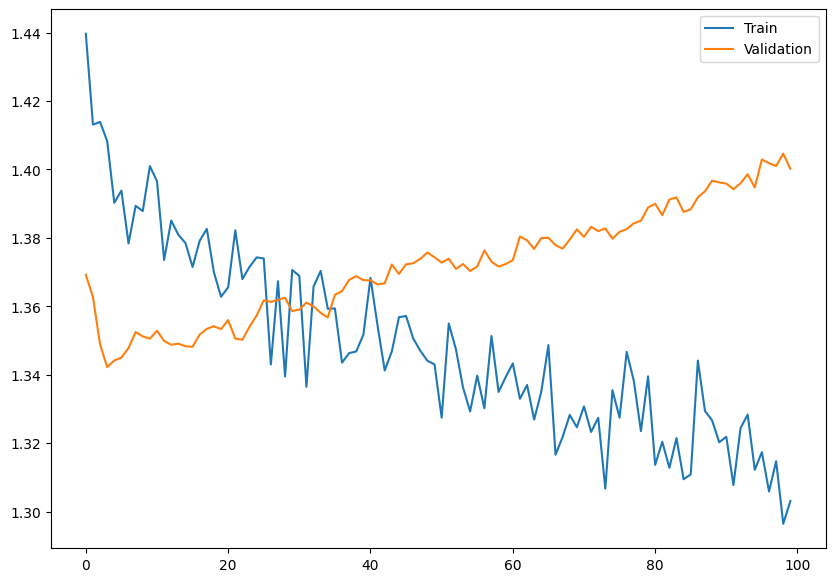

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
file_list_numd = np.arange(len(subjectnamesd))

kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_num
#test_index = file_list_numd
test_index_train, test_index_test = train_test_split(file_list_numd, test_size=0.50, random_state=42)
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
#print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 100
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_c1d[newsubjectname[tr]]
    l = data_c2[newsubjectname[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())
  #print(train_loss_epoch)
  batch_sz = 20
  expectedoutputdeap = []
  actualoutputdeap = []

  for tr in test_index_train:
    v = data_de1[subjectnamesd[tr]]
    l = data_del[subjectnamesd[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()

  for tr in test_index_test:
      net.eval()
      v = data_de1[subjectnamesd[tr]]
      l = data_del[subjectnamesd[tr]]
      net.eval()
      val_loss = []
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i:i+batch_sz].shape)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            #actualoutputdeap.append(torch.round(outputs.cpu()))
            #expectedoutputdeap.append(l[i:i+batch_sz])
            actualoutputdeap.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            expectedoutputdeap.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutputdeap = np.concatenate( expectedoutputdeap, axis=0 )
  actualoutputdeap = np.concatenate( actualoutputdeap, axis=0 )
  #print(expectedoutput.shape)
  #print(actualoutput.shape)
  print(classification_report(expectedoutputdeap,actualoutputdeap))
  print(confusion_matrix(expectedoutputdeap,actualoutputdeap))
  print(f'Validation Loss for {subjectnamesd[tr]} = {val_loss_mean}')
plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
plt.legend()

Fold 39:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 1/100, Train Loss: 1.4469423294067383


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.04      0.07        72
           1       0.24      0.22      0.23        93
           2       0.38      0.37      0.37       104
           3       0.21      0.38      0.27        91

    accuracy                           0.27       360
   macro avg       0.27      0.25      0.24       360
weighted avg       0.28      0.27      0.25       360

[[ 3 14 13 42]
 [ 3 20 18 52]
 [ 4 26 38 36]
 [ 2 23 31 35]]
Validation Loss for P31 = 1.3981918096542358


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 2/100, Train Loss: 1.5537981986999512


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.30      0.22      0.25        72
           1       0.26      0.25      0.25        93
           2       0.38      0.36      0.37       104
           3       0.25      0.33      0.28        91

    accuracy                           0.29       360
   macro avg       0.30      0.29      0.29       360
weighted avg       0.30      0.29      0.29       360

[[16 15 14 27]
 [17 23 19 34]
 [12 26 37 29]
 [ 9 24 28 30]]
Validation Loss for P31 = 1.4209502935409546


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 3/100, Train Loss: 1.4078305959701538


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.35      0.43      0.39        72
           1       0.24      0.24      0.24        93
           2       0.39      0.31      0.34       104
           3       0.27      0.29      0.28        91

    accuracy                           0.31       360
   macro avg       0.31      0.32      0.31       360
weighted avg       0.31      0.31      0.31       360

[[31 14 10 17]
 [26 22 16 29]
 [18 29 32 25]
 [14 27 24 26]]
Validation Loss for P31 = 1.4188883304595947


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 4/100, Train Loss: 1.4455536603927612


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.35      0.51      0.41        72
           1       0.26      0.27      0.26        93
           2       0.45      0.29      0.35       104
           3       0.28      0.27      0.28        91

    accuracy                           0.33       360
   macro avg       0.33      0.34      0.33       360
weighted avg       0.34      0.33      0.32       360

[[37 15  7 13]
 [30 25 11 27]
 [22 29 30 23]
 [18 29 19 25]]
Validation Loss for P31 = 1.4230189323425293


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 5/100, Train Loss: 1.5083985328674316


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.34      0.49      0.40        72
           1       0.25      0.26      0.25        93
           2       0.45      0.24      0.31       104
           3       0.29      0.33      0.31        91

    accuracy                           0.32       360
   macro avg       0.33      0.33      0.32       360
weighted avg       0.33      0.32      0.31       360

[[35 17  5 15]
 [29 24 10 30]
 [22 29 25 28]
 [18 27 16 30]]
Validation Loss for P31 = 1.4205690622329712


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 6/100, Train Loss: 1.245617151260376


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.31      0.53      0.39        72
           1       0.26      0.25      0.26        93
           2       0.48      0.28      0.35       104
           3       0.28      0.27      0.28        91

    accuracy                           0.32       360
   macro avg       0.33      0.33      0.32       360
weighted avg       0.34      0.32      0.32       360

[[38 14  8 12]
 [34 23  9 27]
 [25 24 29 26]
 [26 26 14 25]]
Validation Loss for P31 = 1.426596760749817


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 7/100, Train Loss: 1.4034298658370972


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.31      0.51      0.39        72
           1       0.26      0.24      0.25        93
           2       0.47      0.28      0.35       104
           3       0.27      0.27      0.27        91

    accuracy                           0.31       360
   macro avg       0.33      0.33      0.31       360
weighted avg       0.33      0.31      0.31       360

[[37 14  7 14]
 [33 22 10 28]
 [25 23 29 27]
 [24 26 16 25]]
Validation Loss for P31 = 1.4182466268539429


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 8/100, Train Loss: 1.469029426574707


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.30      0.51      0.38        72
           1       0.27      0.24      0.25        93
           2       0.45      0.25      0.32       104
           3       0.26      0.27      0.27        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.32      0.31      0.30       360

[[37 14  6 15]
 [33 22 10 28]
 [28 21 26 29]
 [24 26 16 25]]
Validation Loss for P31 = 1.4186336994171143


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 9/100, Train Loss: 1.4876998662948608


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.28      0.49      0.36        72
           1       0.26      0.26      0.26        93
           2       0.50      0.20      0.29       104
           3       0.28      0.31      0.29        91

    accuracy                           0.30       360
   macro avg       0.33      0.31      0.30       360
weighted avg       0.34      0.30      0.29       360

[[35 17  4 16]
 [34 24  6 29]
 [30 25 21 28]
 [24 28 11 28]]
Validation Loss for P31 = 1.4204415082931519


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 10/100, Train Loss: 1.3908729553222656
              precision    recall  f1-score   support

           0       0.30      0.56      0.39        72
           1       0.25      0.22      0.23        93
           2       0.48      0.22      0.30       104
           3       0.28      0.30      0.29        91

    accuracy                           0.31       360
   macro avg       0.33      0.32      0.30       360
weighted avg       0.33      0.31      0.30       360

[[40 12  5 15]
 [36 20  8 29]
 [31 23 23 27]
 [28 24 12 27]]
Validation Loss for P31 = 1.4190982580184937


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 11/100, Train Loss: 1.4893856048583984


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.29      0.57      0.39        72
           1       0.27      0.22      0.24        93
           2       0.55      0.22      0.32       104
           3       0.27      0.31      0.29        91

    accuracy                           0.31       360
   macro avg       0.34      0.33      0.31       360
weighted avg       0.35      0.31      0.30       360

[[41 11  3 17]
 [36 20  5 32]
 [34 21 23 26]
 [29 23 11 28]]
Validation Loss for P31 = 1.4192695617675781


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 12/100, Train Loss: 1.2976826429367065
              precision    recall  f1-score   support

           0       0.29      0.56      0.38        72
           1       0.25      0.20      0.23        93
           2       0.55      0.23      0.32       104
           3       0.28      0.32      0.30        91

    accuracy                           0.31       360
   macro avg       0.34      0.33      0.31       360
weighted avg       0.35      0.31      0.30       360

[[40 12  3 17]
 [37 19  6 31]
 [33 21 24 26]
 [28 23 11 29]]
Validation Loss for P31 = 1.4179562330245972


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 13/100, Train Loss: 1.4244340658187866


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.29      0.54      0.37        72
           1       0.25      0.18      0.21        93
           2       0.48      0.25      0.33       104
           3       0.27      0.31      0.29        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.33      0.31      0.30       360

[[39 10  6 17]
 [37 17  8 31]
 [33 19 26 26]
 [27 22 14 28]]
Validation Loss for P31 = 1.4104467630386353


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 14/100, Train Loss: 1.4070079326629639


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.28      0.53      0.37        72
           1       0.27      0.23      0.25        93
           2       0.54      0.24      0.33       104
           3       0.29      0.32      0.30        91

    accuracy                           0.31       360
   macro avg       0.35      0.33      0.31       360
weighted avg       0.36      0.31      0.31       360

[[38 12  5 17]
 [36 21  5 31]
 [35 20 25 24]
 [27 24 11 29]]
Validation Loss for P31 = 1.4115021228790283


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 15/100, Train Loss: 1.494388222694397
              precision    recall  f1-score   support

           0       0.28      0.54      0.37        72
           1       0.27      0.23      0.24        93
           2       0.54      0.25      0.34       104
           3       0.28      0.30      0.29        91

    accuracy                           0.31       360
   macro avg       0.34      0.33      0.31       360
weighted avg       0.35      0.31      0.31       360

[[39 12  5 16]
 [37 21  6 29]
 [35 20 26 23]
 [27 26 11 27]]
Validation Loss for P31 = 1.4150422811508179


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 16/100, Train Loss: 1.3628250360488892
              precision    recall  f1-score   support

           0       0.27      0.50      0.35        72
           1       0.23      0.18      0.20        93
           2       0.52      0.28      0.36       104
           3       0.29      0.31      0.30        91

    accuracy                           0.31       360
   macro avg       0.33      0.32      0.30       360
weighted avg       0.34      0.31      0.30       360

[[36 12  7 17]
 [37 17  9 30]
 [34 19 29 22]
 [26 26 11 28]]
Validation Loss for P31 = 1.4135979413986206


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 17/100, Train Loss: 1.3378746509552002
              precision    recall  f1-score   support

           0       0.27      0.50      0.35        72
           1       0.26      0.23      0.24        93
           2       0.54      0.24      0.33       104
           3       0.29      0.33      0.31        91

    accuracy                           0.31       360
   macro avg       0.34      0.32      0.31       360
weighted avg       0.35      0.31      0.31       360

[[36 14  4 18]
 [34 21  7 31]
 [35 21 25 23]
 [26 25 10 30]]
Validation Loss for P31 = 1.412085771560669


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 18/100, Train Loss: 1.4130972623825073
              precision    recall  f1-score   support

           0       0.28      0.50      0.36        72
           1       0.25      0.24      0.24        93
           2       0.53      0.26      0.35       104
           3       0.30      0.31      0.31        91

    accuracy                           0.31       360
   macro avg       0.34      0.33      0.31       360
weighted avg       0.35      0.31      0.31       360

[[36 15  4 17]
 [35 22  9 27]
 [33 24 27 20]
 [25 27 11 28]]
Validation Loss for P31 = 1.4170894622802734


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 19/100, Train Loss: 1.3931964635849
              precision    recall  f1-score   support

           0       0.27      0.51      0.36        72
           1       0.25      0.22      0.23        93
           2       0.55      0.26      0.35       104
           3       0.29      0.31      0.30        91

    accuracy                           0.31       360
   macro avg       0.34      0.32      0.31       360
weighted avg       0.35      0.31      0.31       360

[[37 14  4 17]
 [38 20  6 29]
 [35 20 27 22]
 [26 25 12 28]]
Validation Loss for P31 = 1.4150089025497437


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 20/100, Train Loss: 1.482466459274292
              precision    recall  f1-score   support

           0       0.27      0.51      0.36        72
           1       0.26      0.23      0.24        93
           2       0.51      0.26      0.34       104
           3       0.28      0.27      0.28        91

    accuracy                           0.31       360
   macro avg       0.33      0.32      0.30       360
weighted avg       0.34      0.31      0.30       360

[[37 14  4 17]
 [38 21  6 28]
 [35 22 27 20]
 [25 25 16 25]]
Validation Loss for P31 = 1.4147075414657593


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 21/100, Train Loss: 1.4071382284164429
              precision    recall  f1-score   support

           0       0.26      0.51      0.35        72
           1       0.26      0.20      0.23        93
           2       0.52      0.29      0.37       104
           3       0.27      0.26      0.27        91

    accuracy                           0.31       360
   macro avg       0.33      0.32      0.30       360
weighted avg       0.34      0.31      0.30       360

[[37 12  7 16]
 [40 19  6 28]
 [35 18 30 21]
 [28 24 15 24]]
Validation Loss for P31 = 1.4176466464996338


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 22/100, Train Loss: 1.3111416101455688
              precision    recall  f1-score   support

           0       0.26      0.51      0.35        72
           1       0.26      0.20      0.23        93
           2       0.51      0.28      0.36       104
           3       0.27      0.26      0.27        91

    accuracy                           0.30       360
   macro avg       0.33      0.32      0.30       360
weighted avg       0.33      0.30      0.30       360

[[37 12  7 16]
 [41 19  5 28]
 [35 19 29 21]
 [28 23 16 24]]
Validation Loss for P31 = 1.4154027700424194


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 23/100, Train Loss: 1.3128507137298584
              precision    recall  f1-score   support

           0       0.26      0.51      0.35        72
           1       0.27      0.20      0.23        93
           2       0.56      0.28      0.37       104
           3       0.28      0.30      0.29        91

    accuracy                           0.31       360
   macro avg       0.34      0.32      0.31       360
weighted avg       0.35      0.31      0.31       360

[[37 12  5 18]
 [41 19  5 28]
 [35 18 29 22]
 [29 22 13 27]]
Validation Loss for P31 = 1.4217326641082764


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 24/100, Train Loss: 1.342606782913208
              precision    recall  f1-score   support

           0       0.26      0.53      0.35        72
           1       0.26      0.19      0.22        93
           2       0.47      0.28      0.35       104
           3       0.30      0.27      0.29        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.33      0.31      0.30       360

[[38 11  7 16]
 [42 18 10 23]
 [36 19 29 20]
 [29 21 16 25]]
Validation Loss for P31 = 1.4203088283538818


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 25/100, Train Loss: 1.2865228652954102
              precision    recall  f1-score   support

           0       0.26      0.51      0.35        72
           1       0.25      0.20      0.22        93
           2       0.46      0.27      0.34       104
           3       0.30      0.27      0.29        91

    accuracy                           0.30       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.33      0.30      0.30       360

[[37 13  6 16]
 [40 19 12 22]
 [35 21 28 20]
 [28 23 15 25]]
Validation Loss for P31 = 1.4245516061782837


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 26/100, Train Loss: 1.3690539598464966
              precision    recall  f1-score   support

           0       0.27      0.51      0.35        72
           1       0.23      0.18      0.20        93
           2       0.49      0.23      0.31       104
           3       0.30      0.33      0.32        91

    accuracy                           0.30       360
   macro avg       0.32      0.31      0.30       360
weighted avg       0.33      0.30      0.29       360

[[37 12  6 17]
 [40 17  8 28]
 [35 21 24 24]
 [27 23 11 30]]
Validation Loss for P31 = 1.4200111627578735


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 27/100, Train Loss: 1.2360960245132446
              precision    recall  f1-score   support

           0       0.26      0.53      0.35        72
           1       0.24      0.18      0.21        93
           2       0.47      0.22      0.30       104
           3       0.31      0.32      0.31        91

    accuracy                           0.30       360
   macro avg       0.32      0.31      0.29       360
weighted avg       0.33      0.30      0.29       360

[[38 11  5 18]
 [41 17 10 25]
 [37 21 23 23]
 [28 23 11 29]]
Validation Loss for P31 = 1.4346076250076294


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 28/100, Train Loss: 1.3657268285751343
              precision    recall  f1-score   support

           0       0.28      0.54      0.37        72
           1       0.24      0.17      0.20        93
           2       0.50      0.25      0.33       104
           3       0.33      0.37      0.35        91

    accuracy                           0.32       360
   macro avg       0.34      0.33      0.31       360
weighted avg       0.35      0.32      0.31       360

[[39 10  6 17]
 [39 16 10 28]
 [35 19 26 24]
 [26 21 10 34]]
Validation Loss for P31 = 1.4282668828964233


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 29/100, Train Loss: 1.3879879713058472
              precision    recall  f1-score   support

           0       0.27      0.50      0.35        72
           1       0.25      0.19      0.22        93
           2       0.44      0.25      0.32       104
           3       0.31      0.32      0.32        91

    accuracy                           0.30       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.32      0.30      0.30       360

[[36 12  7 17]
 [38 18 13 24]
 [35 20 26 23]
 [26 23 13 29]]
Validation Loss for P31 = 1.4270673990249634


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 30/100, Train Loss: 1.317696452140808
              precision    recall  f1-score   support

           0       0.28      0.53      0.37        72
           1       0.25      0.18      0.21        93
           2       0.47      0.27      0.34       104
           3       0.33      0.35      0.34        91

    accuracy                           0.32       360
   macro avg       0.33      0.33      0.32       360
weighted avg       0.34      0.32      0.31       360

[[38 11  6 17]
 [37 17 13 26]
 [34 20 28 22]
 [26 20 13 32]]
Validation Loss for P31 = 1.431281328201294


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 31/100, Train Loss: 1.4103068113327026
              precision    recall  f1-score   support

           0       0.27      0.51      0.36        72
           1       0.24      0.19      0.22        93
           2       0.50      0.24      0.32       104
           3       0.35      0.38      0.36        91

    accuracy                           0.32       360
   macro avg       0.34      0.33      0.32       360
weighted avg       0.35      0.32      0.31       360

[[37 13  5 17]
 [38 18 10 27]
 [34 23 25 22]
 [26 20 10 35]]
Validation Loss for P31 = 1.4269521236419678


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 32/100, Train Loss: 1.2160062789916992
              precision    recall  f1-score   support

           0       0.28      0.53      0.36        72
           1       0.24      0.17      0.20        93
           2       0.47      0.26      0.34       104
           3       0.33      0.36      0.35        91

    accuracy                           0.32       360
   macro avg       0.33      0.33      0.31       360
weighted avg       0.34      0.32      0.31       360

[[38 11  6 17]
 [38 16 12 27]
 [35 19 27 23]
 [26 20 12 33]]
Validation Loss for P31 = 1.430810570716858


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 33/100, Train Loss: 1.423783302307129
              precision    recall  f1-score   support

           0       0.27      0.50      0.35        72
           1       0.25      0.18      0.21        93
           2       0.46      0.26      0.33       104
           3       0.34      0.37      0.36        91

    accuracy                           0.32       360
   macro avg       0.33      0.33      0.31       360
weighted avg       0.34      0.32      0.31       360

[[36 11  8 17]
 [37 17 13 26]
 [36 18 27 23]
 [25 21 11 34]]
Validation Loss for P31 = 1.430283546447754


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 34/100, Train Loss: 1.3803675174713135
              precision    recall  f1-score   support

           0       0.27      0.51      0.36        72
           1       0.25      0.17      0.20        93
           2       0.43      0.27      0.33       104
           3       0.32      0.33      0.32        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.32      0.31      0.30       360

[[37 10  8 17]
 [37 16 15 25]
 [36 18 28 22]
 [26 21 14 30]]
Validation Loss for P31 = 1.4288474321365356


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 35/100, Train Loss: 1.3797653913497925
              precision    recall  f1-score   support

           0       0.26      0.50      0.35        72
           1       0.23      0.16      0.19        93
           2       0.45      0.28      0.35       104
           3       0.33      0.35      0.34        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.31       360
weighted avg       0.33      0.31      0.30       360

[[36 10 10 16]
 [38 15 13 27]
 [36 18 29 21]
 [26 21 12 32]]
Validation Loss for P31 = 1.429241418838501


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 36/100, Train Loss: 1.3629201650619507
              precision    recall  f1-score   support

           0       0.26      0.51      0.35        72
           1       0.23      0.14      0.17        93
           2       0.44      0.27      0.34       104
           3       0.34      0.36      0.35        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.32      0.31      0.30       360

[[37  9  9 17]
 [41 13 13 26]
 [37 17 28 22]
 [27 18 13 33]]
Validation Loss for P31 = 1.4302183389663696


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 37/100, Train Loss: 1.4064387083053589
              precision    recall  f1-score   support

           0       0.26      0.53      0.35        72
           1       0.23      0.15      0.18        93
           2       0.50      0.23      0.32       104
           3       0.35      0.40      0.37        91

    accuracy                           0.31       360
   macro avg       0.33      0.33      0.30       360
weighted avg       0.34      0.31      0.30       360

[[38 11  6 17]
 [42 14 10 27]
 [39 18 24 23]
 [28 19  8 36]]
Validation Loss for P31 = 1.4385771751403809


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 38/100, Train Loss: 1.4865961074829102
              precision    recall  f1-score   support

           0       0.26      0.49      0.34        72
           1       0.25      0.18      0.21        93
           2       0.46      0.25      0.33       104
           3       0.36      0.40      0.37        91

    accuracy                           0.32       360
   macro avg       0.33      0.33      0.31       360
weighted avg       0.34      0.32      0.31       360

[[35 12  9 16]
 [38 17 12 26]
 [37 18 26 23]
 [26 20  9 36]]
Validation Loss for P31 = 1.4374607801437378


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 39/100, Train Loss: 1.3019312620162964
              precision    recall  f1-score   support

           0       0.26      0.49      0.34        72
           1       0.27      0.19      0.23        93
           2       0.45      0.24      0.31       104
           3       0.36      0.40      0.37        91

    accuracy                           0.32       360
   macro avg       0.33      0.33      0.31       360
weighted avg       0.34      0.32      0.31       360

[[35 11 10 16]
 [37 18 12 26]
 [38 18 25 23]
 [26 20  9 36]]
Validation Loss for P31 = 1.434249758720398


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 40/100, Train Loss: 1.343324065208435
              precision    recall  f1-score   support

           0       0.25      0.49      0.33        72
           1       0.29      0.19      0.23        93
           2       0.43      0.25      0.32       104
           3       0.34      0.37      0.36        91

    accuracy                           0.31       360
   macro avg       0.33      0.33      0.31       360
weighted avg       0.34      0.31      0.31       360

[[35 11 10 16]
 [37 18 14 24]
 [39 14 26 25]
 [27 19 11 34]]
Validation Loss for P31 = 1.4343427419662476


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 41/100, Train Loss: 1.2909495830535889
              precision    recall  f1-score   support

           0       0.26      0.51      0.35        72
           1       0.25      0.16      0.20        93
           2       0.43      0.22      0.29       104
           3       0.34      0.40      0.37        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.33      0.31      0.30       360

[[37 11  8 16]
 [38 15 13 27]
 [39 15 23 27]
 [27 19  9 36]]
Validation Loss for P31 = 1.4348095655441284


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 42/100, Train Loss: 1.347305178642273


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.27      0.53      0.35        72
           1       0.26      0.17      0.21        93
           2       0.42      0.24      0.30       104
           3       0.34      0.36      0.35        91

    accuracy                           0.31       360
   macro avg       0.32      0.33      0.30       360
weighted avg       0.33      0.31      0.30       360

[[38 11  8 15]
 [38 16 15 24]
 [40 15 25 24]
 [27 19 12 33]]
Validation Loss for P31 = 1.4370898008346558


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 43/100, Train Loss: 1.2952289581298828
              precision    recall  f1-score   support

           0       0.26      0.50      0.35        72
           1       0.27      0.18      0.22        93
           2       0.40      0.26      0.32       104
           3       0.31      0.32      0.31        91

    accuracy                           0.30       360
   macro avg       0.31      0.32      0.30       360
weighted avg       0.32      0.30      0.30       360

[[36 11  9 16]
 [37 17 14 25]
 [37 16 27 24]
 [26 19 17 29]]
Validation Loss for P31 = 1.4393426179885864


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 44/100, Train Loss: 1.3581489324569702
              precision    recall  f1-score   support

           0       0.26      0.51      0.35        72
           1       0.27      0.18      0.22        93
           2       0.42      0.24      0.31       104
           3       0.34      0.36      0.35        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.31       360
weighted avg       0.33      0.31      0.30       360

[[37 11  9 15]
 [38 17 13 25]
 [39 15 25 25]
 [27 19 12 33]]
Validation Loss for P31 = 1.4345635175704956


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 45/100, Train Loss: 1.3382622003555298
              precision    recall  f1-score   support

           0       0.26      0.49      0.34        72
           1       0.27      0.19      0.23        93
           2       0.44      0.27      0.33       104
           3       0.33      0.35      0.34        91

    accuracy                           0.31       360
   macro avg       0.33      0.33      0.31       360
weighted avg       0.33      0.31      0.31       360

[[35 13  9 15]
 [36 18 14 25]
 [35 16 28 25]
 [27 19 13 32]]
Validation Loss for P31 = 1.431372046470642


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 46/100, Train Loss: 1.2879228591918945
              precision    recall  f1-score   support

           0       0.26      0.51      0.35        72
           1       0.25      0.16      0.19        93
           2       0.42      0.26      0.32       104
           3       0.32      0.33      0.32        91

    accuracy                           0.30       360
   macro avg       0.31      0.32      0.30       360
weighted avg       0.32      0.30      0.29       360

[[37 12  8 15]
 [38 15 15 25]
 [37 15 27 25]
 [28 19 14 30]]
Validation Loss for P31 = 1.4281373023986816


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 47/100, Train Loss: 1.4048007726669312
              precision    recall  f1-score   support

           0       0.26      0.49      0.33        72
           1       0.26      0.16      0.20        93
           2       0.41      0.24      0.30       104
           3       0.34      0.38      0.36        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.32      0.31      0.30       360

[[35 10 11 16]
 [38 15 14 26]
 [38 14 25 27]
 [26 19 11 35]]
Validation Loss for P31 = 1.4243656396865845


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 48/100, Train Loss: 1.2245649099349976
              precision    recall  f1-score   support

           0       0.25      0.47      0.33        72
           1       0.27      0.17      0.21        93
           2       0.38      0.26      0.31       104
           3       0.31      0.32      0.31        91

    accuracy                           0.29       360
   macro avg       0.30      0.31      0.29       360
weighted avg       0.31      0.29      0.29       360

[[34 11 12 15]
 [38 16 14 25]
 [37 15 27 25]
 [26 18 18 29]]
Validation Loss for P31 = 1.4268791675567627


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 49/100, Train Loss: 1.3307541608810425
              precision    recall  f1-score   support

           0       0.25      0.47      0.33        72
           1       0.25      0.17      0.21        93
           2       0.37      0.23      0.28       104
           3       0.31      0.32      0.31        91

    accuracy                           0.29       360
   macro avg       0.29      0.30      0.28       360
weighted avg       0.30      0.29      0.28       360

[[34 12 11 15]
 [38 16 14 25]
 [38 16 24 26]
 [27 19 16 29]]
Validation Loss for P31 = 1.4387096166610718


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 50/100, Train Loss: 1.3321876525878906
              precision    recall  f1-score   support

           0       0.25      0.46      0.33        72
           1       0.26      0.19      0.22        93
           2       0.42      0.25      0.31       104
           3       0.32      0.35      0.34        91

    accuracy                           0.30       360
   macro avg       0.31      0.31      0.30       360
weighted avg       0.32      0.30      0.30       360

[[33 13 11 15]
 [36 18 12 27]
 [35 17 26 26]
 [26 20 13 32]]
Validation Loss for P31 = 1.430764079093933


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 51/100, Train Loss: 1.2895859479904175


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.49      0.33        72
           1       0.25      0.17      0.21        93
           2       0.42      0.23      0.30       104
           3       0.34      0.38      0.36        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.32      0.31      0.30       360

[[35 11 10 16]
 [38 16 12 27]
 [38 17 24 25]
 [26 19 11 35]]
Validation Loss for P31 = 1.4320794343948364


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 52/100, Train Loss: 1.3192074298858643


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.47      0.33        72
           1       0.25      0.17      0.20        93
           2       0.41      0.27      0.33       104
           3       0.32      0.33      0.32        91

    accuracy                           0.30       360
   macro avg       0.31      0.31      0.30       360
weighted avg       0.31      0.30      0.29       360

[[34 11 12 15]
 [38 16 13 26]
 [35 17 28 24]
 [26 20 15 30]]
Validation Loss for P31 = 1.427160620689392


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 53/100, Train Loss: 1.437440276145935


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.46      0.32        72
           1       0.26      0.18      0.22        93
           2       0.41      0.25      0.31       104
           3       0.32      0.35      0.34        91

    accuracy                           0.30       360
   macro avg       0.31      0.31      0.30       360
weighted avg       0.32      0.30      0.29       360

[[33 12 12 15]
 [37 17 12 27]
 [36 17 26 25]
 [26 19 14 32]]
Validation Loss for P31 = 1.4301353693008423


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 54/100, Train Loss: 1.4076271057128906


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.49      0.33        72
           1       0.27      0.17      0.21        93
           2       0.44      0.26      0.33       104
           3       0.33      0.36      0.35        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.33      0.31      0.30       360

[[35 10 10 17]
 [38 16 13 26]
 [38 15 27 24]
 [27 19 12 33]]
Validation Loss for P31 = 1.4301795959472656


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 55/100, Train Loss: 1.3066627979278564
              precision    recall  f1-score   support

           0       0.26      0.49      0.33        72
           1       0.25      0.15      0.19        93
           2       0.44      0.27      0.33       104
           3       0.32      0.36      0.34        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.32      0.31      0.30       360

[[35  9 10 18]
 [38 14 14 27]
 [37 15 28 24]
 [27 19 12 33]]
Validation Loss for P31 = 1.4279769659042358


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 56/100, Train Loss: 1.2109092473983765
              precision    recall  f1-score   support

           0       0.26      0.50      0.34        72
           1       0.25      0.15      0.19        93
           2       0.42      0.23      0.30       104
           3       0.31      0.36      0.33        91

    accuracy                           0.30       360
   macro avg       0.31      0.31      0.29       360
weighted avg       0.32      0.30      0.29       360

[[36  8 10 18]
 [38 14 12 29]
 [38 15 24 27]
 [29 18 11 33]]
Validation Loss for P31 = 1.4296525716781616


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 57/100, Train Loss: 1.3469241857528687
              precision    recall  f1-score   support

           0       0.26      0.50      0.34        72
           1       0.28      0.17      0.21        93
           2       0.40      0.20      0.27       104
           3       0.32      0.38      0.35        91

    accuracy                           0.30       360
   macro avg       0.31      0.31      0.29       360
weighted avg       0.32      0.30      0.29       360

[[36  8 10 18]
 [39 16 11 27]
 [39 15 21 29]
 [27 19 10 35]]
Validation Loss for P31 = 1.4342864751815796


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 58/100, Train Loss: 1.3350194692611694
              precision    recall  f1-score   support

           0       0.26      0.51      0.35        72
           1       0.25      0.14      0.18        93
           2       0.43      0.25      0.32       104
           3       0.31      0.36      0.34        91

    accuracy                           0.30       360
   macro avg       0.31      0.32      0.29       360
weighted avg       0.32      0.30      0.29       360

[[37  7 10 18]
 [39 13 12 29]
 [38 15 26 25]
 [27 18 13 33]]
Validation Loss for P31 = 1.428281545639038


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 59/100, Train Loss: 1.2917940616607666
              precision    recall  f1-score   support

           0       0.26      0.50      0.35        72
           1       0.27      0.17      0.21        93
           2       0.45      0.24      0.31       104
           3       0.31      0.37      0.34        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.33      0.31      0.30       360

[[36  9  9 18]
 [38 16 10 29]
 [36 15 25 28]
 [26 19 12 34]]
Validation Loss for P31 = 1.4351199865341187


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 60/100, Train Loss: 1.3691068887710571
              precision    recall  f1-score   support

           0       0.27      0.51      0.35        72
           1       0.27      0.17      0.21        93
           2       0.43      0.23      0.30       104
           3       0.32      0.37      0.35        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.33      0.31      0.30       360

[[37  9 10 16]
 [38 16 11 28]
 [37 16 24 27]
 [27 19 11 34]]
Validation Loss for P31 = 1.4414390325546265


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 61/100, Train Loss: 1.381166934967041
              precision    recall  f1-score   support

           0       0.26      0.50      0.35        72
           1       0.25      0.16      0.20        93
           2       0.42      0.25      0.31       104
           3       0.32      0.36      0.34        91

    accuracy                           0.31       360
   macro avg       0.31      0.32      0.30       360
weighted avg       0.32      0.31      0.30       360

[[36  9 12 15]
 [38 15 12 28]
 [35 16 26 27]
 [27 19 12 33]]
Validation Loss for P31 = 1.4380995035171509


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 62/100, Train Loss: 1.4201364517211914
              precision    recall  f1-score   support

           0       0.26      0.49      0.34        72
           1       0.26      0.17      0.21        93
           2       0.43      0.23      0.30       104
           3       0.32      0.38      0.35        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.33      0.31      0.30       360

[[35 10 11 16]
 [38 16 11 28]
 [35 16 24 29]
 [27 19 10 35]]
Validation Loss for P31 = 1.4425429105758667


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 63/100, Train Loss: 1.3525803089141846
              precision    recall  f1-score   support

           0       0.25      0.46      0.32        72
           1       0.27      0.18      0.22        93
           2       0.39      0.22      0.28       104
           3       0.32      0.36      0.34        91

    accuracy                           0.29       360
   macro avg       0.31      0.31      0.29       360
weighted avg       0.31      0.29      0.29       360

[[33 12 12 15]
 [37 17 12 27]
 [36 16 23 29]
 [27 19 12 33]]
Validation Loss for P31 = 1.44371497631073


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 64/100, Train Loss: 1.3731083869934082


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.50      0.34        72
           1       0.26      0.16      0.20        93
           2       0.43      0.22      0.29       104
           3       0.33      0.40      0.36        91

    accuracy                           0.31       360
   macro avg       0.32      0.32      0.30       360
weighted avg       0.33      0.31      0.29       360

[[36 10 11 15]
 [39 15 11 28]
 [37 14 23 30]
 [27 19  9 36]]
Validation Loss for P31 = 1.4444704055786133


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 65/100, Train Loss: 1.4437922239303589


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.44      0.32        72
           1       0.26      0.16      0.20        93
           2       0.40      0.22      0.28       104
           3       0.31      0.38      0.34        91

    accuracy                           0.29       360
   macro avg       0.30      0.30      0.29       360
weighted avg       0.31      0.29      0.28       360

[[32 11 11 18]
 [37 15 12 29]
 [35 15 23 31]
 [27 17 12 35]]
Validation Loss for P31 = 1.4341763257980347


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 66/100, Train Loss: 1.3055367469787598
              precision    recall  f1-score   support

           0       0.25      0.44      0.32        72
           1       0.28      0.18      0.22        93
           2       0.38      0.22      0.28       104
           3       0.31      0.38      0.34        91

    accuracy                           0.30       360
   macro avg       0.31      0.31      0.29       360
weighted avg       0.31      0.30      0.29       360

[[32 10 13 17]
 [35 17 12 29]
 [34 16 23 31]
 [27 17 12 35]]
Validation Loss for P31 = 1.4376338720321655


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 67/100, Train Loss: 1.3136171102523804


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.46      0.32        72
           1       0.26      0.16      0.20        93
           2       0.38      0.20      0.26       104
           3       0.32      0.40      0.35        91

    accuracy                           0.29       360
   macro avg       0.30      0.30      0.28       360
weighted avg       0.31      0.29      0.28       360

[[33  9 13 17]
 [39 15 12 27]
 [35 15 21 33]
 [27 18 10 36]]
Validation Loss for P31 = 1.4468138217926025


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 68/100, Train Loss: 1.2362207174301147


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.47      0.33        72
           1       0.25      0.15      0.19        93
           2       0.40      0.23      0.29       104
           3       0.34      0.41      0.37        91

    accuracy                           0.30       360
   macro avg       0.31      0.32      0.29       360
weighted avg       0.32      0.30      0.29       360

[[34  9 12 17]
 [39 14 15 25]
 [35 15 24 30]
 [28 17  9 37]]
Validation Loss for P31 = 1.4458695650100708


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 69/100, Train Loss: 1.3049856424331665


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.46      0.32        72
           1       0.23      0.14      0.17        93
           2       0.38      0.23      0.29       104
           3       0.33      0.40      0.36        91

    accuracy                           0.29       360
   macro avg       0.30      0.31      0.29       360
weighted avg       0.30      0.29      0.28       360

[[33  9 14 16]
 [37 13 16 27]
 [36 15 24 29]
 [26 19 10 36]]
Validation Loss for P31 = 1.4491362571716309


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 70/100, Train Loss: 1.2988771200180054


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.46      0.33        72
           1       0.24      0.14      0.18        93
           2       0.39      0.23      0.29       104
           3       0.32      0.40      0.35        91

    accuracy                           0.29       360
   macro avg       0.30      0.31      0.29       360
weighted avg       0.30      0.29      0.28       360

[[33  9 13 17]
 [37 13 15 28]
 [34 14 24 32]
 [26 19 10 36]]
Validation Loss for P31 = 1.4525940418243408


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 71/100, Train Loss: 1.2745201587677002
              precision    recall  f1-score   support

           0       0.24      0.40      0.30        72
           1       0.27      0.16      0.20        93
           2       0.37      0.26      0.31       104
           3       0.33      0.41      0.36        91

    accuracy                           0.30       360
   macro avg       0.30      0.31      0.29       360
weighted avg       0.31      0.30      0.29       360

[[29  9 17 17]
 [34 15 18 26]
 [32 13 27 32]
 [25 18 11 37]]
Validation Loss for P31 = 1.4468683004379272


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 72/100, Train Loss: 1.3266946077346802
              precision    recall  f1-score   support

           0       0.24      0.40      0.30        72
           1       0.26      0.16      0.20        93
           2       0.33      0.22      0.27       104
           3       0.32      0.40      0.35        91

    accuracy                           0.29       360
   macro avg       0.29      0.30      0.28       360
weighted avg       0.29      0.29      0.28       360

[[29 10 16 17]
 [33 15 18 27]
 [33 14 23 34]
 [24 19 12 36]]
Validation Loss for P31 = 1.4521087408065796


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 73/100, Train Loss: 1.3099631071090698
              precision    recall  f1-score   support

           0       0.23      0.40      0.30        72
           1       0.27      0.14      0.18        93
           2       0.35      0.24      0.29       104
           3       0.33      0.42      0.37        91

    accuracy                           0.29       360
   macro avg       0.29      0.30      0.28       360
weighted avg       0.30      0.29      0.28       360

[[29  7 18 18]
 [35 13 17 28]
 [34 13 25 32]
 [26 16 11 38]]
Validation Loss for P31 = 1.4451020956039429


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 74/100, Train Loss: 1.3680346012115479
              precision    recall  f1-score   support

           0       0.23      0.39      0.29        72
           1       0.27      0.14      0.18        93
           2       0.36      0.26      0.30       104
           3       0.34      0.42      0.37        91

    accuracy                           0.29       360
   macro avg       0.30      0.30      0.29       360
weighted avg       0.30      0.29      0.29       360

[[28  7 19 18]
 [35 13 19 26]
 [33 14 27 30]
 [27 15 11 38]]
Validation Loss for P31 = 1.448761224746704


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 75/100, Train Loss: 1.313679575920105
              precision    recall  f1-score   support

           0       0.24      0.39      0.29        72
           1       0.26      0.15      0.19        93
           2       0.36      0.27      0.31       104
           3       0.34      0.42      0.37        91

    accuracy                           0.30       360
   macro avg       0.30      0.31      0.29       360
weighted avg       0.31      0.30      0.29       360

[[28  7 18 19]
 [33 14 20 26]
 [32 15 28 29]
 [25 17 11 38]]
Validation Loss for P31 = 1.4438990354537964


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 76/100, Train Loss: 1.3604440689086914
              precision    recall  f1-score   support

           0       0.23      0.38      0.29        72
           1       0.27      0.16      0.20        93
           2       0.35      0.28      0.31       104
           3       0.35      0.41      0.38        91

    accuracy                           0.30       360
   macro avg       0.30      0.31      0.29       360
weighted avg       0.31      0.30      0.29       360

[[27  8 20 17]
 [32 15 22 24]
 [33 15 29 27]
 [25 17 12 37]]
Validation Loss for P31 = 1.4468507766723633


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 77/100, Train Loss: 1.3244093656539917
              precision    recall  f1-score   support

           0       0.24      0.38      0.29        72
           1       0.25      0.14      0.18        93
           2       0.35      0.28      0.31       104
           3       0.35      0.42      0.38        91

    accuracy                           0.30       360
   macro avg       0.29      0.30      0.29       360
weighted avg       0.30      0.30      0.29       360

[[27  7 20 18]
 [31 13 23 26]
 [32 15 29 28]
 [24 17 12 38]]
Validation Loss for P31 = 1.4444950819015503


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 78/100, Train Loss: 1.385205626487732
              precision    recall  f1-score   support

           0       0.25      0.38      0.30        72
           1       0.23      0.13      0.16        93
           2       0.34      0.27      0.30       104
           3       0.33      0.42      0.37        91

    accuracy                           0.29       360
   macro avg       0.29      0.30      0.28       360
weighted avg       0.29      0.29      0.28       360

[[27  9 19 17]
 [29 12 23 29]
 [30 15 28 31]
 [24 17 12 38]]
Validation Loss for P31 = 1.4350807666778564


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 79/100, Train Loss: 1.347246766090393
              precision    recall  f1-score   support

           0       0.24      0.38      0.29        72
           1       0.26      0.14      0.18        93
           2       0.35      0.28      0.31       104
           3       0.34      0.42      0.37        91

    accuracy                           0.30       360
   macro avg       0.30      0.30      0.29       360
weighted avg       0.30      0.30      0.29       360

[[27  7 20 18]
 [30 13 24 26]
 [31 13 29 31]
 [26 17 10 38]]
Validation Loss for P31 = 1.4369534254074097


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 80/100, Train Loss: 1.3149664402008057
              precision    recall  f1-score   support

           0       0.24      0.40      0.30        72
           1       0.24      0.14      0.18        93
           2       0.40      0.28      0.33       104
           3       0.34      0.41      0.37        91

    accuracy                           0.30       360
   macro avg       0.30      0.31      0.29       360
weighted avg       0.31      0.30      0.29       360

[[29  9 15 19]
 [37 13 18 25]
 [31 16 29 28]
 [26 17 11 37]]
Validation Loss for P31 = 1.438946008682251


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 81/100, Train Loss: 1.2973476648330688
              precision    recall  f1-score   support

           0       0.24      0.40      0.30        72
           1       0.29      0.18      0.23        93
           2       0.38      0.27      0.31       104
           3       0.31      0.36      0.34        91

    accuracy                           0.30       360
   macro avg       0.31      0.30      0.29       360
weighted avg       0.31      0.30      0.29       360

[[29  9 15 19]
 [33 17 17 26]
 [33 16 28 27]
 [28 16 14 33]]
Validation Loss for P31 = 1.4356106519699097


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 82/100, Train Loss: 1.3107093572616577
              precision    recall  f1-score   support

           0       0.24      0.39      0.30        72
           1       0.27      0.16      0.20        93
           2       0.36      0.27      0.31       104
           3       0.32      0.38      0.35        91

    accuracy                           0.29       360
   macro avg       0.30      0.30      0.29       360
weighted avg       0.30      0.29      0.29       360

[[28  9 17 18]
 [32 15 20 26]
 [30 16 28 30]
 [27 16 13 35]]
Validation Loss for P31 = 1.4363092184066772


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 83/100, Train Loss: 1.3166736364364624
              precision    recall  f1-score   support

           0       0.24      0.39      0.30        72
           1       0.26      0.15      0.19        93
           2       0.38      0.32      0.35       104
           3       0.34      0.38      0.36        91

    accuracy                           0.31       360
   macro avg       0.31      0.31      0.30       360
weighted avg       0.31      0.31      0.30       360

[[28  8 18 18]
 [33 14 22 24]
 [29 16 33 26]
 [27 16 13 35]]
Validation Loss for P31 = 1.435693383216858


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 84/100, Train Loss: 1.3713232278823853
              precision    recall  f1-score   support

           0       0.24      0.38      0.29        72
           1       0.28      0.17      0.21        93
           2       0.35      0.27      0.30       104
           3       0.33      0.40      0.36        91

    accuracy                           0.30       360
   macro avg       0.30      0.30      0.29       360
weighted avg       0.30      0.30      0.29       360

[[27  9 19 17]
 [30 16 22 25]
 [30 16 28 30]
 [27 16 12 36]]
Validation Loss for P31 = 1.4372150897979736


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 85/100, Train Loss: 1.35194993019104
              precision    recall  f1-score   support

           0       0.23      0.39      0.29        72
           1       0.28      0.18      0.22        93
           2       0.36      0.26      0.30       104
           3       0.32      0.36      0.34        91

    accuracy                           0.29       360
   macro avg       0.30      0.30      0.29       360
weighted avg       0.30      0.29      0.29       360

[[28 10 17 17]
 [34 17 18 24]
 [32 16 27 29]
 [27 17 14 33]]
Validation Loss for P31 = 1.4392861127853394


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 86/100, Train Loss: 1.304158091545105
              precision    recall  f1-score   support

           0       0.25      0.44      0.32        72
           1       0.28      0.18      0.22        93
           2       0.37      0.25      0.30       104
           3       0.32      0.35      0.33        91

    accuracy                           0.30       360
   macro avg       0.30      0.31      0.29       360
weighted avg       0.31      0.30      0.29       360

[[32 10 13 17]
 [35 17 16 25]
 [35 16 26 27]
 [27 17 15 32]]
Validation Loss for P31 = 1.4399698972702026


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 87/100, Train Loss: 1.3460434675216675


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.43      0.31        72
           1       0.28      0.18      0.22        93
           2       0.37      0.28      0.32       104
           3       0.32      0.34      0.33        91

    accuracy                           0.30       360
   macro avg       0.31      0.31      0.30       360
weighted avg       0.31      0.30      0.30       360

[[31 10 15 16]
 [33 17 19 24]
 [34 16 29 25]
 [27 17 16 31]]
Validation Loss for P31 = 1.4332188367843628


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 88/100, Train Loss: 1.3378514051437378


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.43      0.32        72
           1       0.29      0.18      0.22        93
           2       0.38      0.29      0.33       104
           3       0.32      0.34      0.33        91

    accuracy                           0.30       360
   macro avg       0.31      0.31      0.30       360
weighted avg       0.31      0.30      0.30       360

[[31  9 16 16]
 [33 17 18 25]
 [33 16 30 25]
 [27 17 16 31]]
Validation Loss for P31 = 1.4375272989273071


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 89/100, Train Loss: 1.3708651065826416
              precision    recall  f1-score   support

           0       0.24      0.40      0.30        72
           1       0.26      0.16      0.20        93
           2       0.41      0.32      0.36       104
           3       0.36      0.41      0.38        91

    accuracy                           0.32       360
   macro avg       0.32      0.32      0.31       360
weighted avg       0.33      0.32      0.31       360

[[29  9 17 17]
 [33 15 20 25]
 [31 16 33 24]
 [27 17 10 37]]
Validation Loss for P31 = 1.4511812925338745


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 90/100, Train Loss: 1.3191328048706055
              precision    recall  f1-score   support

           0       0.25      0.42      0.31        72
           1       0.25      0.15      0.19        93
           2       0.39      0.31      0.34       104
           3       0.36      0.41      0.38        91

    accuracy                           0.31       360
   macro avg       0.31      0.32      0.31       360
weighted avg       0.32      0.31      0.31       360

[[30  8 18 16]
 [33 14 22 24]
 [31 16 32 25]
 [27 17 10 37]]
Validation Loss for P31 = 1.4530868530273438


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 91/100, Train Loss: 1.3872308731079102
              precision    recall  f1-score   support

           0       0.24      0.39      0.30        72
           1       0.26      0.16      0.20        93
           2       0.40      0.33      0.36       104
           3       0.36      0.40      0.37        91

    accuracy                           0.31       360
   macro avg       0.31      0.32      0.31       360
weighted avg       0.32      0.31      0.31       360

[[28  9 19 16]
 [32 15 21 25]
 [30 16 34 24]
 [27 17 11 36]]
Validation Loss for P31 = 1.4509594440460205


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 92/100, Train Loss: 1.313848853111267
              precision    recall  f1-score   support

           0       0.25      0.40      0.31        72
           1       0.27      0.16      0.20        93
           2       0.39      0.32      0.35       104
           3       0.35      0.40      0.37        91

    accuracy                           0.31       360
   macro avg       0.31      0.32      0.31       360
weighted avg       0.32      0.31      0.31       360

[[29  8 19 16]
 [32 15 21 25]
 [30 16 33 25]
 [26 17 12 36]]
Validation Loss for P31 = 1.4543410539627075


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 93/100, Train Loss: 1.3468687534332275
              precision    recall  f1-score   support

           0       0.24      0.39      0.30        72
           1       0.25      0.15      0.19        93
           2       0.37      0.30      0.33       104
           3       0.34      0.40      0.37        91

    accuracy                           0.30       360
   macro avg       0.30      0.31      0.30       360
weighted avg       0.31      0.30      0.30       360

[[28  8 19 17]
 [32 14 22 25]
 [30 16 31 27]
 [27 17 11 36]]
Validation Loss for P31 = 1.4513472318649292


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 94/100, Train Loss: 1.4600716829299927
              precision    recall  f1-score   support

           0       0.24      0.38      0.29        72
           1       0.27      0.17      0.21        93
           2       0.37      0.30      0.33       104
           3       0.34      0.38      0.36        91

    accuracy                           0.30       360
   macro avg       0.30      0.31      0.30       360
weighted avg       0.31      0.30      0.30       360

[[27 10 19 16]
 [31 16 21 25]
 [30 16 31 27]
 [26 18 12 35]]
Validation Loss for P31 = 1.438309907913208


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: Us

Epoch 95/100, Train Loss: 1.2852060794830322
              precision    recall  f1-score   support

           0       0.24      0.39      0.30        72
           1       0.26      0.16      0.20        93
           2       0.36      0.29      0.32       104
           3       0.35      0.40      0.37        91

    accuracy                           0.30       360
   macro avg       0.30      0.31      0.30       360
weighted avg       0.31      0.30      0.30       360

[[28  8 20 16]
 [31 15 22 25]
 [30 17 30 27]
 [27 17 11 36]]
Validation Loss for P31 = 1.4490795135498047


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 96/100, Train Loss: 1.2491992712020874
              precision    recall  f1-score   support

           0       0.24      0.42      0.31        72
           1       0.26      0.16      0.20        93
           2       0.39      0.29      0.33       104
           3       0.35      0.40      0.37        91

    accuracy                           0.31       360
   macro avg       0.31      0.32      0.30       360
weighted avg       0.32      0.31      0.30       360

[[30  9 17 16]
 [35 15 19 24]
 [32 16 30 26]
 [27 17 11 36]]
Validation Loss for P31 = 1.456639051437378


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


Epoch 97/100, Train Loss: 1.3072054386138916
              precision    recall  f1-score   support

           0       0.24      0.40      0.30        72
           1       0.26      0.16      0.20        93
           2       0.38      0.29      0.33       104
           3       0.36      0.41      0.38        91

    accuracy                           0.31       360
   macro avg       0.31      0.31      0.30       360
weighted avg       0.32      0.31      0.30       360

[[29  9 18 16]
 [34 15 21 23]
 [31 16 30 27]
 [27 17 10 37]]
Validation Loss for P31 = 1.4539234638214111


/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 98/100, Train Loss: 1.3938792943954468
              precision    recall  f1-score   support

           0       0.23      0.39      0.29        72
           1       0.27      0.17      0.21        93
           2       0.38      0.28      0.32       104
           3       0.36      0.42      0.39        91

    accuracy                           0.31       360
   macro avg       0.31      0.31      0.30       360
weighted avg       0.32      0.31      0.30       360

[[28 10 18 16]
 [33 16 20 24]
 [32 16 29 27]
 [27 17  9 38]]
Validation Loss for P31 = 1.4486186504364014


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

Epoch 99/100, Train Loss: 1.3783003091812134
              precision    recall  f1-score   support

           0       0.23      0.38      0.29        72
           1       0.27      0.17      0.21        93
           2       0.37      0.28      0.32       104
           3       0.36      0.42      0.39        91

    accuracy                           0.31       360
   macro avg       0.31      0.31      0.30       360
weighted avg       0.31      0.31      0.30       360

[[27 10 19 16]
 [31 16 21 25]
 [31 17 29 27]
 [27 16 10 38]]
Validation Loss for P31 = 1.4492075443267822


/tmp/ipykernel_233/2598240933.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 100/100, Train Loss: 1.3592942953109741
              precision    recall  f1-score   support

           0       0.23      0.36      0.28        72
           1       0.26      0.16      0.20        93
           2       0.38      0.32      0.35       104
           3       0.35      0.40      0.37        91

    accuracy                           0.31       360
   macro avg       0.31      0.31      0.30       360
weighted avg       0.31      0.31      0.30       360

[[26 10 20 16]
 [31 15 22 25]
 [30 16 33 25]
 [26 17 12 36]]
Validation Loss for P31 = 1.447343111038208


/tmp/ipykernel_233/2598240933.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_233/2598240933.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


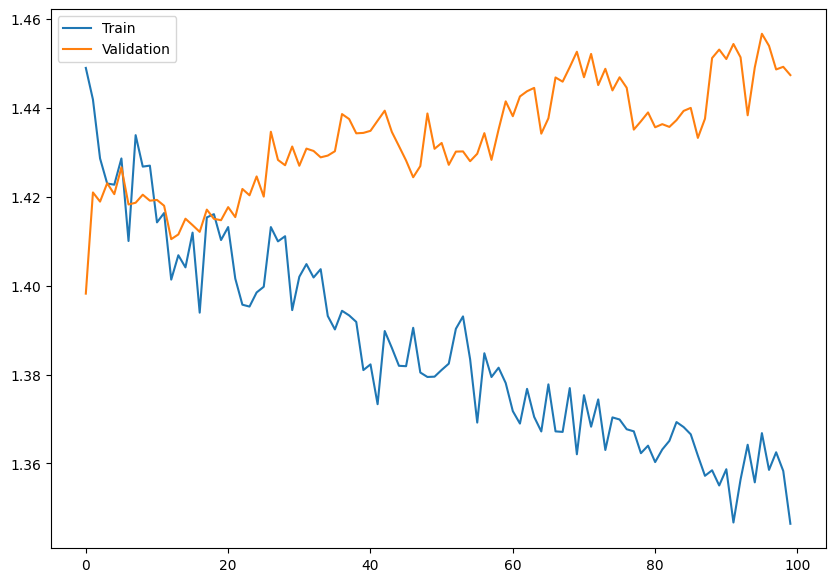

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
file_list_numd = np.arange(len(subjectnamesd))

kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_numd
test_index_train, test_index_test = train_test_split(file_list_num, test_size=0.50, random_state=42)
#test_index = file_list_num
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
#print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 100
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_de1[subjectnamesd[tr]]
    l = data_del[subjectnamesd[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  for tr in test_index_train:
    v = data_c1d[newsubjectname[tr]]
    l = data_c2[newsubjectname[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())
  #print(train_loss_epoch)
  expectedoutputamigos = []
  actualoutputamigos = []

  for tr in test_index_test:
      net.eval()

      v = data_c1d[newsubjectname[tr]]
      l = data_c2[newsubjectname[tr]]
      net.eval()
      val_loss = []
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i:i+batch_sz].shape)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            #actualoutputamigos.append(torch.round(outputs.cpu()))
            #expectedoutputamigos.append(l[i:i+batch_sz])
            actualoutputamigos.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            expectedoutputamigos.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutputamigos = np.concatenate( expectedoutputamigos, axis=0 )
  actualoutputamigos = np.concatenate( actualoutputamigos, axis=0 )
  #print(expectedoutput.shape)
  #print(actualoutput.shape)
  print(classification_report(expectedoutputamigos,actualoutputamigos))
  print(confusion_matrix(expectedoutputamigos,actualoutputamigos))
  print(f'Validation Loss for {newsubjectname[tr]} = {val_loss_mean}')
plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
plt.legend()